# **Data Analysis Cycle**

<center><img src='Image/Advanced/DataAnalysis_Cycle0.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle1.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle2.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle3.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle4.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle5.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle6.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle7.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle8.png' width='800'></center>
<center><img src='Image/Advanced/DataAnalysis_Cycle9.png' width='800'></center>

# **Import Library:** 분석에 사용할 모듈 설치

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error

# **Data Loading:** 분석에 사용할 데이터 불러오기

In [3]:
# 보스턴 집값 데이터 로딩
# sklearn 로딩
# sklearn 사용하여 데이터정보 불러오기
# 데이터정보 내 데이터설명과 데이터프레임 출력하기
from sklearn.datasets import load_boston
raw = load_boston()
print(raw.DESCR)
print(raw.keys())
print(raw.data.shape, raw.target.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# DataFrame으로 변환 후 데이터 출력
X = pd.DataFrame(raw.data, columns=raw.feature_names)
Y = pd.DataFrame(raw.target, columns=['Price'])
display(X, Y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48


,Price
0,24.00
1,21.60
2,34.70
3,33.40
4,36.20
...,...
501,22.40
502,20.60
503,23.90
504,22.00


In [5]:
# PC에 저장된 데이터의 위치 확인
# 파이썬이 데이터 위치를 확인할 수 있게 코드로 변환
# pandas 사용하여 데이터 불러오기
# 불러온 데이터 이름은 통상 dataframe의 약자인 df로 사용하는 편
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,'18',2.31,'0',0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,'0',7.07,'0',0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,'0',7.07,'0',0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,'0',2.18,'0',0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,'0',2.18,'0',0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,'0',11.93,'0',0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,'0',11.93,'0',0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,'0',11.93,'0',0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,'0',11.93,'0',0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [6]:
# # 데이터 불러오기 실행(방법1)
# # 아래 코드 실행 후 파일 선택을 눌러서
# # 'Price_Modify_KK.csv' 파일을 선택해주면 로딩 완료
# from google.colab import files
# files.upload()

# # 아래 코드 실행 시 'Price_Modify_KK.csv' 데이터 출력 가능
# import pandas as pd
# df = pd.read_csv('Price_Modify_KK.csv')
# df

# **Preprocessing:** 데이터 정리 및 패턴 추출하기

## 자료형 변환

- **목표:** 각 `변수의 특성을 확인`하고 `범주형`과 `연속형`에 맞도록 `변경`

<center><img src='Image/Advanced/Basic_DataType.PNG' width='1000'></center>

- **사람의 데이터 분류:**

> - **데이터 관계에 따라**: `Y = f(X)` 
>
> | **대분류** 	| **의미/예시** 	|
|:---:	|:---:	|
| **독립변수(Independent Variable)** 	| 다른 변수에 영향을 미치는 변수 (X) 	|
| **종속변수(Dependent Variable)** 	| 다른 변수에 의해 영향을 받는 변수 (Y) 	|
>
> - **데이터 특성에 따라**:
>
> | **대분류** 	| **소분류** 	| **의미/예시** 	|
|:---:	|:---:	|:---:	|
| **질적변수(Qualitative Variable)** 	| **-** 	| 내부 값이 특정 범주(Category)로 분류된 변수(색상,성별,종교) 	|
|  	| **명목형 변수(Nominal Variable)** 	| 값이 순위가 존재하지 않는 경우(혈액형) 	|
|  	| **순위형 변수(Ordinal Variable)** 	| 값이 순위가 존재하는 경우(성적) 	|
| **양적변수(Quantitative Variable)** 	| **-** 	| 내부 값이 다양한 숫자 분포로 구성된 변수(키,몸무게,소득) 	|
|  	| **이산형 변수(Discrete Variable)** 	| 값이 셀수 있는 경우(정수) 	|
|  	| **연속형 변수(Continuous Variable)** 	| 값이 셀수 없는 경우(실수) 	|

- **컴퓨터의 데이터 분류:**

| **대분류** 	| **소분류** 	| **컴퓨터의 분류1** 	| **컴퓨터의 분류2** 	|
|:---:	|:---:	|:---:	|:---:	|
| **질적변수(Qualitative Variable)** 	| **-** 	| - | 범주형 |
|  	| **명목형 변수(Nominal Variable)** 	|  문자	|  범주형 |
|  	| **순위형 변수(Ordinal Variable)** 	|  숫자	|  범주형 |
| **양적변수(Quantitative Variable)** 	| **-** 	| - | 연속형 |
|  	| **이산형 변수(Discrete Variable)** 	|  숫자	| 연속형 |
|  	| **연속형 변수(Continuous Variable)** 	|  숫자	| 연속형 |

---
---

|   변수  |              설명              |
|:-------:|:------------------------------:|
|  Price  |            주택 가격           |
|   CRIM  |        1인당 범죄 발생률       |
|    ZN   |       주택용 토지의 비율       |
|  INDUS  |      비소매 상업지역 비율      |
|   CHAS  |    찰스강 인접 여부(인접=1)    |
|   NOX   |         일산화질소 농도        |
|    RM   |            방의 개수           |
|   AGE   | 1940년 이전에 건축된 주택 비율 |
|   DIS   |     주요 5대 회사와의 거리     |
|   RAD   |         고속도로 접근성        |
|   TAX   |             재산세             |
| PTRATIO |       교사와 학생의 비율       |
|    B    |         흑인 거주 비율         |
|  LSTAT  |          저소득층 비율         |

In [7]:
# 데이터의 각 column의 타입을 확인하기
# df.shape
# df.ndim
# df.head()
# df.tail()
# df.describe(include='all').T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    object 
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    object 
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 55.5+ KB


In [8]:
# 데이터 수치 확인
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,'18',2.31,'0',0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,'0',7.07,'0',0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,'0',7.07,'0',0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,'0',2.18,'0',0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,'0',2.18,'0',0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,'0',11.93,'0',0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,'0',11.93,'0',0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,'0',11.93,'0',0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,'0',11.93,'0',0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [9]:
# 각 column의 타입이 문자인 경우 숫자로 변환하기
col = []
if df['ZN'].dtype == 'object':
    for i in df['ZN']:
        col.append(float(i[1:-1]))
    df['ZN'] = col

col = []
if df['CHAS'].dtype == 'object':
    for i in df['CHAS']:
        col.append(float(i[1:-1]))
    df['CHAS'] = col

In [10]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 결측값 처리

---

<center><img src='Image/Advanced/Pandas_DataFrameStructure.png' width='700'>(https://www.geeksforgeeks.org/creating-a-pandas-dataframe/)</center>

- **목표:** 결측값이란 `값이 비어있는 것(NaN)`을 의미하며, `알고리즘 작동을 어렵게` 하고 작동이 되어도 `해석의 왜곡` 가능성 존재하기 때문에 `처리 필요`

> - **삭제:** 결측값이 발생한 모든 변수(Column)를 삭제하거나 일부(Row)를 삭제
>
>```python
>df.dropna(axis=0)    # 행 삭제
>df.dropna(axis=1)    # 열 삭제
>```
> - **대체:** 결측값을 제외한 값들의 `통계량으로 결측값을 대체`
>> - 중심 통계량
>> - 분포 기반 랜던 추출
>>
>>```python
>>df.fillna(df.mean())    # 평균치로 대체
>>df.fillna(df.median())    # 중앙값으로 대체
>>df.fillna(df.mode())    # 최빈값으로 대체
>>```
> - **예측:** 별도 분석을 통해 `결측값을 예측`하여 삽입
>> - Interpolation
>> - Regression Imputation
>> - EM Algorithm
>>
>>```python
>>df.interpolate(method='linear')    # 선형방식으로 삽입
>>df.interpolate(method='time')    # 인덱스 날짜고려 선형방식으로 삽입
>>df.interpolate(method='spline')    # 비선형방식으로 삽입
>>df.interpolate(method='polynomial')    # 비선형 다항식으로 삽입
>>```
>
> | **결측치 비율** 	| **처리 방향** 	|
|:---:	|:---:	|
| **10% 미만** 	| 삭제 또는 통계량기반 대체 	|
| **10% ~ 30%** 	| 모델링기반 예측 	|
| **30% 이상** 	| 변수의 완전성/신뢰성 문제로 삭제 	|
<center>(Hair et al., 2016)</center>

In [11]:
# 데이터의 각 값이 비어있는지 확인하기
df.isnull()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# 데이터의 각 column에서 비어있는 값의 갯수 확인하기
df.isnull().sum()

Price       0
CRIM       11
ZN          0
INDUS      33
CHAS        0
NOX         0
RM          2
AGE         0
DIS        57
RAD         0
TAX         0
PTRATIO     0
B           2
LSTAT      17
dtype: int64

In [13]:
# 결측값을 눈으로 확인하기 위한 모듈 설치하기
!pip install missingno

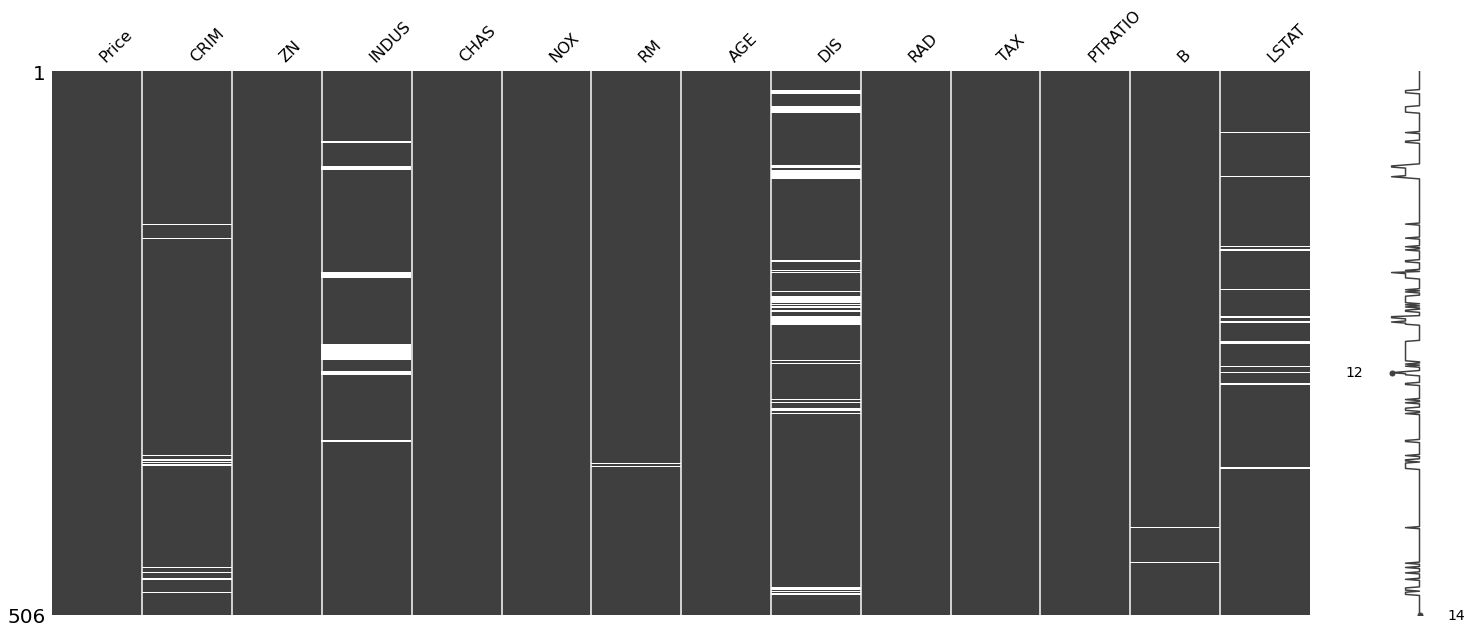

In [14]:
# missingno 모듈 사용하여 결측값의 위치를 확인하기
import missingno as msno

msno.matrix(df)
plt.show()

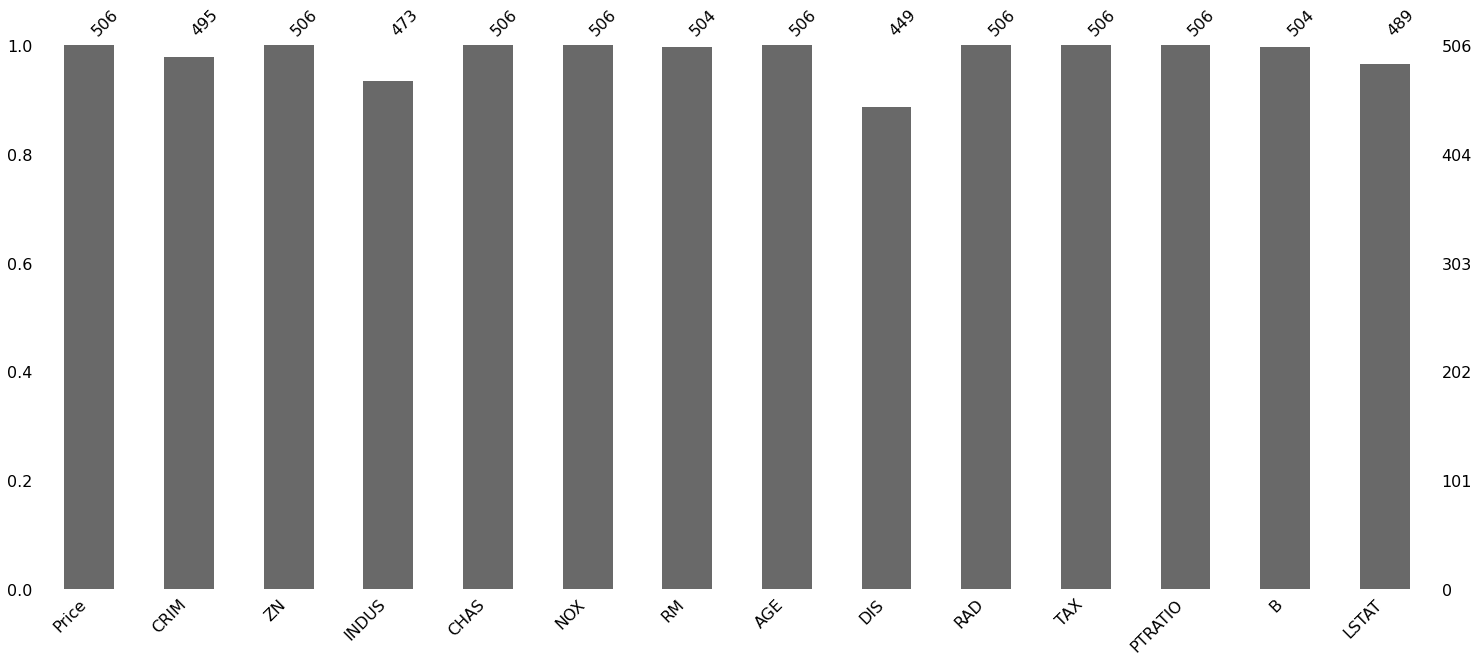

In [15]:
# missingno 모듈 사용하여 결측값의 갯수 확인하기
msno.bar(df)
plt.show()

In [16]:
# 결측값이 있는 "열" 삭제하기
df.dropna(axis=1)

,Price,ZN,CHAS,NOX,AGE,RAD,TAX,PTRATIO
0,24.00,18.00,0.00,0.54,65.20,1,296,15.30
1,21.60,0.00,0.00,0.47,78.90,2,242,17.80
2,34.70,0.00,0.00,0.47,61.10,2,242,17.80
3,33.40,0.00,0.00,0.46,45.80,3,222,18.70
4,36.20,0.00,0.00,0.46,54.20,3,222,18.70
...,...,...,...,...,...,...,...,...
501,22.40,0.00,0.00,0.57,69.10,1,273,21.00
502,20.60,0.00,0.00,0.57,76.70,1,273,21.00
503,23.90,0.00,0.00,0.57,91.00,1,273,21.00
504,22.00,0.00,0.00,0.57,89.30,1,273,21.00


In [17]:
# 결측값이 있는 "행" 삭제하기
df.dropna(axis=0)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [18]:
# 내부 매개변수 inplace = True 를 반영하지 않으면 실제 삭제되지 않음
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [19]:
# 결측값을 특정 값으로 채우기
df.fillna(df.mean()).isnull().sum()

Price      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

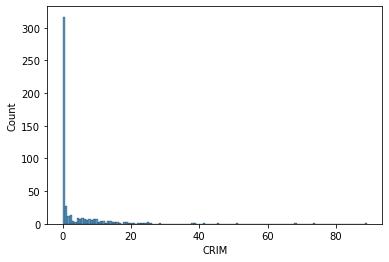

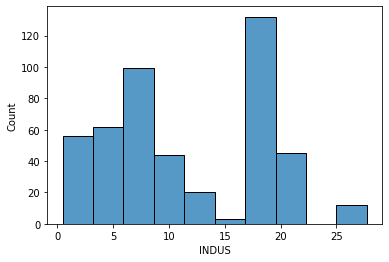

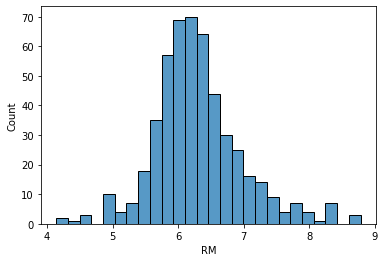

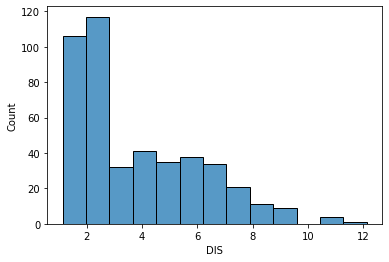

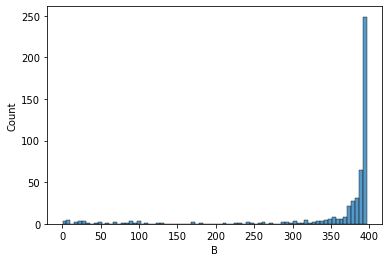

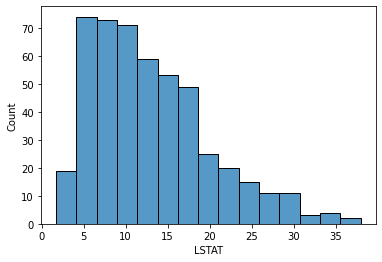

In [20]:
# 어떻게 결측값을 채울지 고민하기 위해 결측값이 존재하는 변수들의 분포 확인
for i in df.columns[df.isnull().sum() != 0]:
    sns.histplot(data=df, x=i)
    plt.show()

In [21]:
# 정규분포와 유사한 변수는 평균으로 채우되, 그렇지 않은 변수는 중앙값으로 채움
for col in df.columns[df.isnull().sum() != 0]:
    if col not in ['INDUS', 'RM']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [22]:
# 데이터의 각 column에서 비어있는 값의 갯수 확인하기
df.isnull().sum()

Price      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

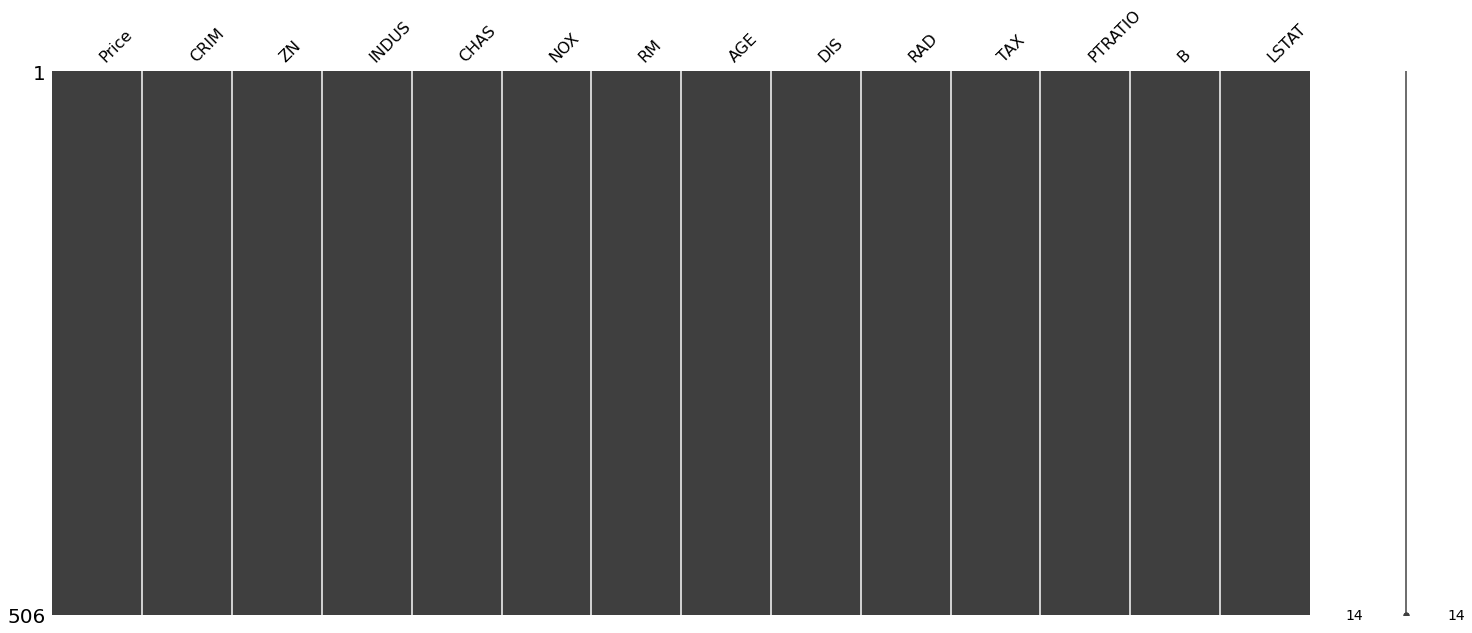

In [23]:
# 데이터의 각 column에서 비어있는 값의 갯수 확인하기
msno.matrix(df)
plt.show()

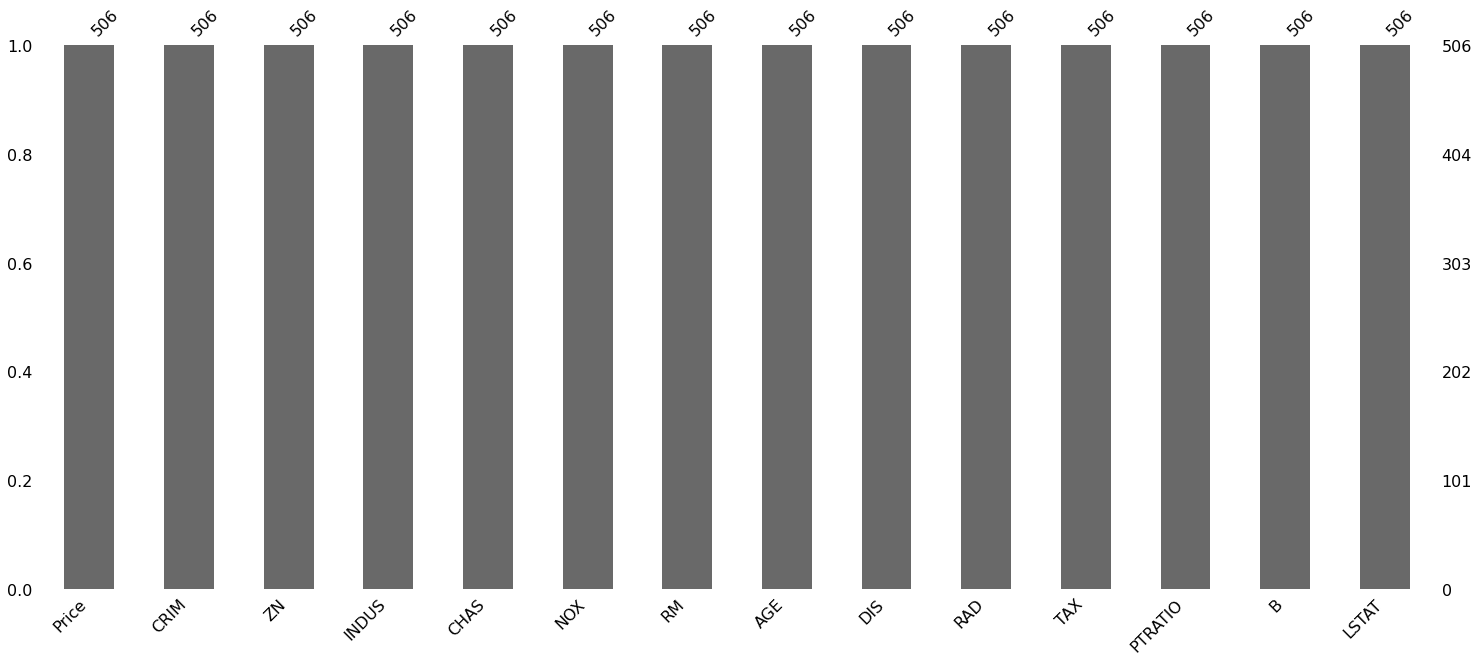

In [24]:
# 데이터의 각 column에서 비어있는 값의 갯수 확인하기
msno.bar(df)
plt.show()

## 이상치 처리

- **목표:** 일반적인 데이터와 `동떨어진 관측치`로 분석 결과를 `왜곡할 가능성을 줄이는 것`

**1) 검출:**
> - 전통적으로 분포(Boxplot / Histogram / Scatter Plot 등)의 `중심에서 벗어난 값`을 지칭
> - `빅데이터` 시대에서는 `이상치의 존재 유무? 논란`이 존재
> <center><img src='Image/Advanced/BoxPlot.png' width='600'></center>

**2) 처리:**
> - **삭제:** `Human Error` 등은 보통 삭제 처리
> - **대체:** `스몰데이터`의 경우 삭제시 데이터의 양이 적어지기에 다른 값으로 대체
> - **예측:** 별도 `분석을 통해` 이상치 대신 `예측값`으로 반영
> - **변수화:** 이상치를 변수화 하여 유의성을 판별
> - **별도 분석:** 이상치 포함 분석과 이상치 미포함 분석을 `병행 진행`

In [25]:
# 데이터 프레임의 column 이름 확인하기
df.columns

Index(['Price', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

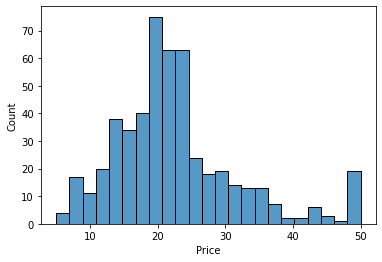

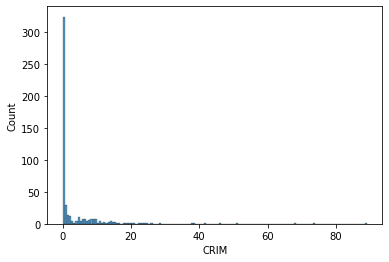

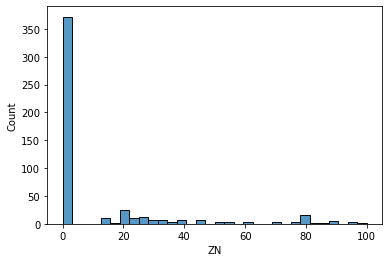

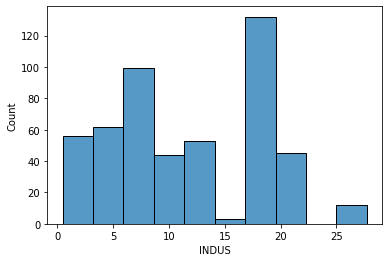

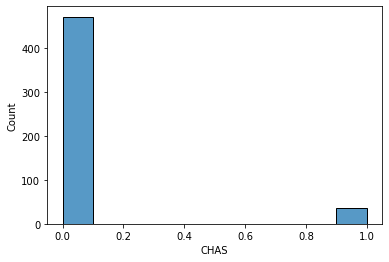

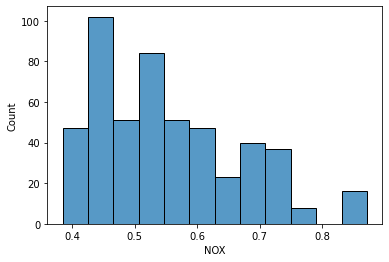

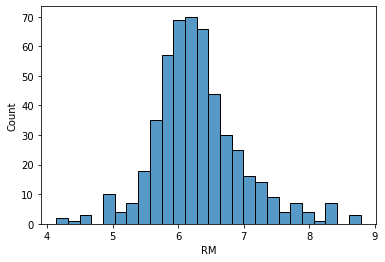

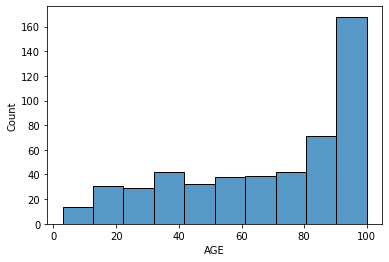

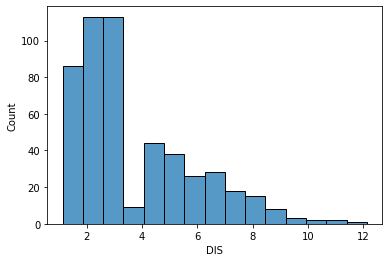

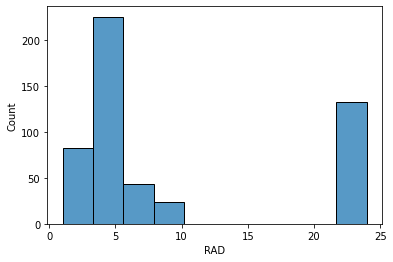

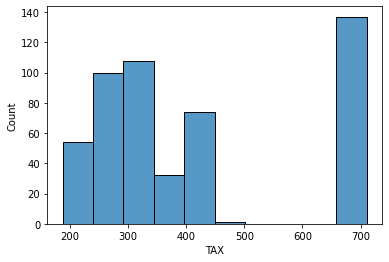

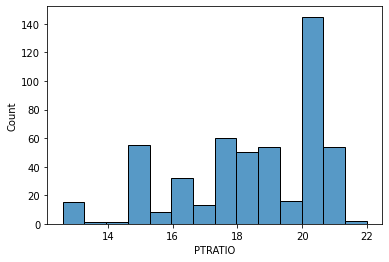

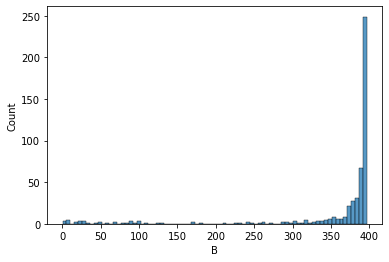

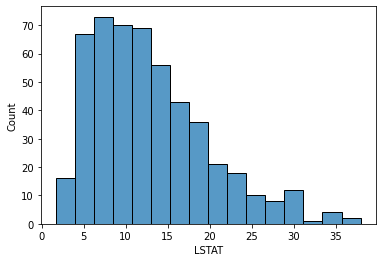

In [26]:
# 시각화를 위한 seaborn, marplotlib.pyplot 호출하기
# 모든 column들의 히스토그램(분포) 그리기
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    sns.histplot(data=df, x=col)
    plt.show()

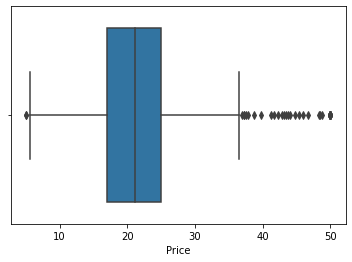

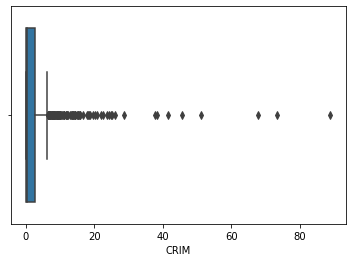

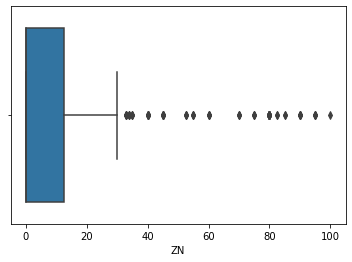

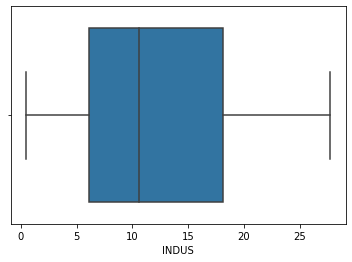

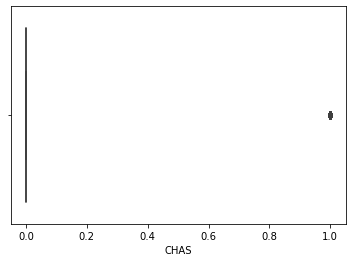

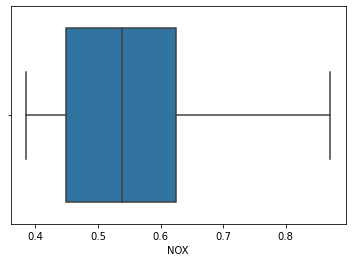

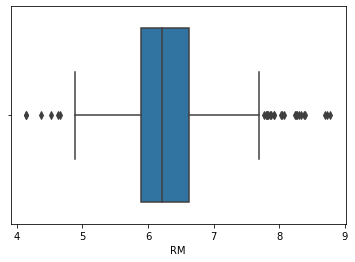

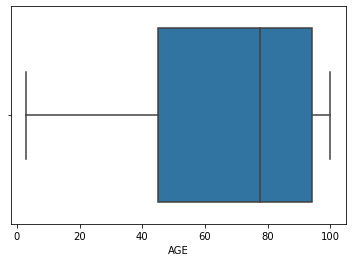

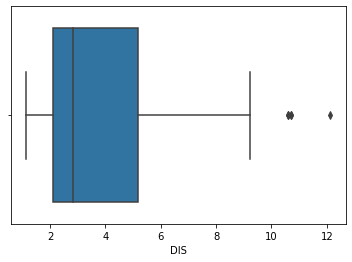

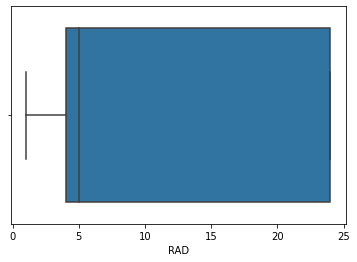

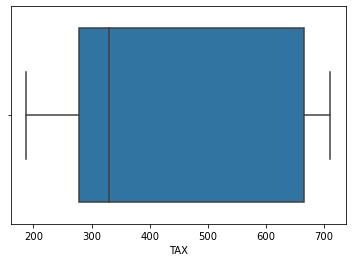

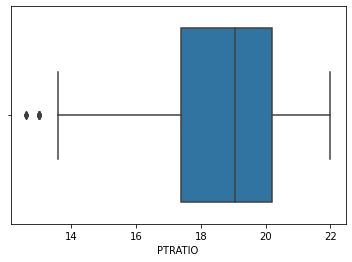

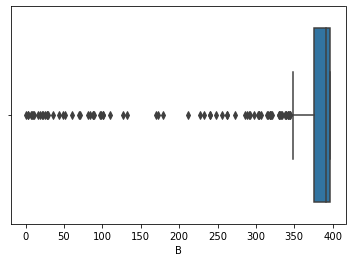

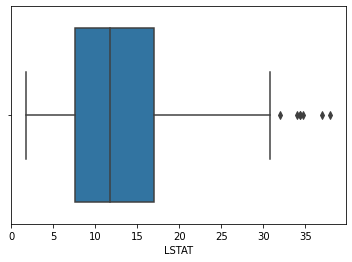

In [27]:
# 모든 column들의 박스플롯(분포) 그리기
for col in df.columns:
#     sns.histplot(data=df, x=col)
    sns.boxplot(x=col, data=df)
    plt.show()

### Code Summary

In [28]:
# 자료형 변환 + 결측값 처리
def prep(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리#
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].median(), inplace=True)
        else:
            df[i].fillna(df[i].mean(), inplace=True)
            
    return df

In [29]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


## 데이터 분리

- **배경:**
> **(1) 독립변수와 종속변수 구분**
> 
> | **대분류** 	| **의미/예시** 	|
|:---:	|:---:	|
| **독립변수(Independent Variable)** 	| 다른 변수에 영향을 미치는 변수 (X) 	|
| **종속변수(Dependent Variable)** 	| 다른 변수에 의해 영향을 받는 변수 (Y) 	|
>
> **(2) 과거/현재와 미래 기간 구분:** 과거/현재의 상황을 분석하고, 미래를 예측 할 수 있는 환경 구축
> <br>
>
> - **Training Period:** 과거/현재의 상황을 분석
>
> <center><img src='Image/Advanced/DataSplit_Concept1.png' width='700'></center>
> <br>
>
> - **Testing Period:** 미래를 예측 할 수 있는 환경
>
> <center><img src='Image/Advanced/DataSplit_Concept2.png' width='700'></center>

**1) 간단한 방법(Holdout Validation):**

- **훈련셋(Training set):** 일반적으로 `전체 데이터의 70%` 사용 
- **테스트셋(Testing set):** 일반적으로 `전체 데이터의 30%` 사용

**2) 일반적 방법(Simple Validation):**
- **훈련셋(Training set):** 일반적으로 `전체 데이터의 60%`를 사용
- **검증셋(Validation set):** 
> - 개발셋이라고도 하며, 일반적으로 `전체 데이터의 20%`를 사용함
> - `훈련된 여러가지 모델들의 성능을 테스트` 하는데 사용되며 모델 선택의 기준이 됨
- **테스트셋(Testing set):** 일반적으로 `전체 데이터의 20%`를 사용하며 최종 모델의 정확성을 확인하는 목적에 사용됨
<center><img src='Image/Advanced/DataSplit_Simple.png' width='500'></center>


In [30]:
# 종속변수로 사용할 column 이름 지정하기
# 종속변수 column 이름 외 나머지를 모두 독립변수로 지정하기
# 종속변수와 독립변수를 출력하기
Y_colname = ['Price']
X_colname = [x for x in df.columns if x not in Y_colname]
Y_colname, X_colname

(['Price'],
 ['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'])

In [31]:
# sklean 패키지 내 mocel_selection 모듈에서 train_test_split 함수를 호출하기
# train_test_split 함수를 사용하여 X_train, X_test, Y_train, Y_test 4개의 집단으로 구분하기
from sklearn.model_selection import train_test_split

train_test_split(df[X_colname], df[Y_colname],
                 test_size=0.2, random_state=123)

[     CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS  RAD  TAX  PTRATIO      B  \
 203  0.04 95.00   2.68  0.00 0.42 7.85  33.20 5.12    4  224    14.70 392.78   
 441  9.72  0.00  18.10  0.00 0.74 6.41  97.20 2.07   24  666    20.20 385.96   
 172  0.14  0.00   4.05  0.00 0.51 5.57  88.50 2.60    5  296    16.60 396.90   
 95   0.12  0.00   2.89  0.00 0.45 6.62  57.80 2.83    2  276    18.00 357.98   
 54   0.01 75.00   4.00  0.00 0.41 5.89  47.60 7.32    3  469    21.10 396.90   
 ..    ...   ...    ...   ...  ...  ...    ...  ...  ...  ...      ...    ...   
 98   0.08  0.00   2.89  0.00 0.45 7.82  36.90 2.83    2  276    18.00 393.53   
 476  4.87  0.00  18.10  0.00 0.61 6.48  93.60 2.31   24  666    20.20 396.21   
 322  0.35  0.00   7.38  0.00 0.49 6.04  49.90 4.72    5  287    19.60 396.90   
 382  9.19  0.00  18.10  0.00 0.70 5.54 100.00 1.58   24  666    20.20 396.90   
 365  4.56  0.00  18.10  0.00 0.72 6.29  87.90 1.61   24  666    20.20 354.70   
 
      LSTAT  
 203  11.69 

In [32]:
# train_test_split 함수를 사용하여 X_train, X_test, Y_train, Y_test 4개의 집단으로 구분하기
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                    test_size=0.2, random_state=123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [33]:
# 미래 예측 값인 X_test, Y_test를 출력하기
display(X_test, Y_test)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.14,0.00,18.10,0.00,0.60,5.76,100.00,1.41,24,666,20.20,2.60,10.11
85,0.06,0.00,4.49,0.00,0.45,6.63,56.10,4.44,3,247,18.50,392.30,6.53
280,0.04,20.00,11.66,0.00,0.44,7.82,64.50,4.69,5,216,14.90,387.31,11.69
422,12.05,0.00,18.10,0.00,0.61,5.65,87.60,1.95,24,666,20.20,291.55,14.10
199,0.03,95.00,1.47,0.00,0.40,6.97,15.30,7.65,3,402,17.00,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.00,0.50,6.55,21.40,2.83,8,307,17.40,380.34,11.69
159,1.43,0.00,19.58,0.00,0.87,6.51,100.00,1.77,5,403,14.70,364.31,7.39
196,0.04,80.00,1.52,0.00,0.40,7.29,34.10,7.31,2,329,12.60,396.90,4.08
345,0.03,0.00,4.39,0.00,0.44,6.01,48.50,8.01,3,352,18.80,385.64,10.53


,Price
410,15.00
85,26.60
280,45.40
422,20.80
199,34.90
...,...
229,31.50
159,23.30
196,33.30
345,17.50


### Code Summary

In [34]:
# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [35]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)
display(X_test, Y_test)

(404, 13) (404, 1)
(102, 13) (102, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.14,0.00,18.10,0.00,0.60,5.76,100.00,1.41,24,666,20.20,2.60,10.11
85,0.06,0.00,4.49,0.00,0.45,6.63,56.10,4.44,3,247,18.50,392.30,6.53
280,0.04,20.00,11.66,0.00,0.44,7.82,64.50,4.69,5,216,14.90,387.31,11.69
422,12.05,0.00,18.10,0.00,0.61,5.65,87.60,1.95,24,666,20.20,291.55,14.10
199,0.03,95.00,1.47,0.00,0.40,6.97,15.30,7.65,3,402,17.00,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.00,0.50,6.55,21.40,2.83,8,307,17.40,380.34,11.69
159,1.43,0.00,19.58,0.00,0.87,6.51,100.00,1.77,5,403,14.70,364.31,7.39
196,0.04,80.00,1.52,0.00,0.40,7.29,34.10,7.31,2,329,12.60,396.90,4.08
345,0.03,0.00,4.39,0.00,0.44,6.01,48.50,8.01,3,352,18.80,385.64,10.53


,Price
410,15.00
85,26.60
280,45.40
422,20.80
199,34.90
...,...
229,31.50
159,23.30
196,33.30
345,17.50


## 데이터 변환

- **목표:** 컴퓨터와 알고리즘이 이해하도록 `숫자 형태로 변환`

| **대분류** 	| **소분류** 	| **컴퓨터의 분류1** 	| **컴퓨터의 분류2** 	|
|:---:	|:---:	|:---:	|:---:	|
| **질적변수(Qualitative Variable)** 	| **-** 	| - | 범주형 |
|  	| **명목형 변수(Nominal Variable)** 	|  문자	|  범주형 |
|  	| **순위형 변수(Ordinal Variable)** 	|  숫자	|  범주형 |
| **양적변수(Quantitative Variable)** 	| **-** 	| - | 연속형 |
|  	| **이산형 변수(Discrete Variable)** 	|  숫자	| 연속형 |
|  	| **연속형 변수(Continuous Variable)** 	|  숫자	| 연속형 |

> - **문자형 vs 숫자형**: `문자`를 숫자로 바꾸어 컴퓨터가 이해가능하도록 변환
> - **범주형 vs 연속형**: `범주형`을 알고리즘이 이해가능하도록 변환
>> - 연속형 변수들은 대부분 알고리즘에서 자동으로 처리됨
>> - `기계학습(Machine Learning)은 범주형 데이터를 처리`하는데서 출발
>> - 경우에 따라선 `연속형 변수를 범주형`으로 변환 필요

**1) Binning(구간화):** `연속형 변수를 범주형` 변수로 변환

- 숫자로 구성된 `연속형 값이 넓을 경우` 그룹을 지어 이해도를 높임
- 변수의 선형적 특성 이외에 `비선형적 특성을 반영`

**2) Label Encoding:** `범주형 변수`의 값들을 `숫자 값(레이블)`로 변경

<center><img src='Image/Advanced/Label_Encoding.png' width='250'></center>

**3) Dummy Variable(가변수, $D_i$)**: `범주형 변수`를 `0 또는 1값`을 가진 `하나 이상의 새로운 변수`로 변경(One-hot Encoding)

- **생성법:** `계절변수`가 봄/여름/가을/겨울 이라는 값을 포함하는 경우, `계절_봄`, `계절_여름`, `계절_가을`, `계절_겨울` 총 4개의 변수를 생성

> (1) 범주형 변수의 `독립 값을 확인` (봄/여름/가을/겨울)
>
> (2) 독립 값의 `갯수만큼 더미변수`를 생성 ($D_1$ = 봄, $D_2$ = 여름, $D_3$ = 가을, $D_3$ = 겨울) 
>> *더미변수의 갯수는 최대 1개까지 줄일 수 있음*
>
> (3) 각 `더미변수들의 값`은 변수의 정의와 `같으면 1`이고 `나머지는 0`으로 채움   

<center><img src='Image/Advanced/Dummy_Engineering.png' width='500'></center>

<!-- <center><img src='Image/Dummy-variable-regression.jpg' width='400'></center> -->

In [36]:
# 데이터의 각 column 마다 unique한 값이 몇개인지 출력하기
# unique한 값이 많이 않거나 범주형이라 생각되는 경우 확인하기
for col in X_train.columns:
    unique_count = len(X_train[col].unique())
    print(col, unique_count)

CRIM 395
ZN 26
INDUS 65
CHAS 2
NOX 79
RM 371
AGE 300
DIS 309
RAD 9
TAX 63
PTRATIO 46
B 291
LSTAT 364


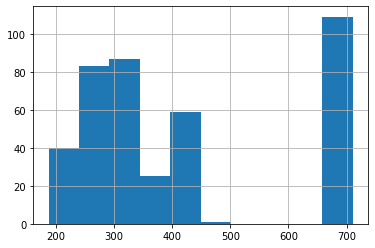

In [37]:
# TAX column이 연속형 값이 너무 많아 범주형 변환을 위해 분포 확인하기
X_train.TAX.hist()
plt.show()

In [38]:
# 기초통계로 분포 확인하기
X_train.TAX.describe()

count   404.00
mean    408.45
std     168.50
min     187.00
25%     279.00
50%     330.00
75%     666.00
max     711.00
Name: TAX, dtype: float64

In [39]:
# 범주형 변환을 위한 기준점들 정하기
# 범주형 값으로 변환하기
interval = [100, 200, 300, 400, 500, 600, 700, 800]
np.digitize(X_train['TAX'], bins=interval)

array([2, 6, 2, 2, 4, 6, 3, 4, 4, 6, 4, 4, 6, 3, 2, 6, 4, 6, 6, 2, 2, 6,
       3, 1, 3, 2, 4, 4, 3, 6, 6, 6, 4, 6, 3, 6, 3, 6, 4, 1, 6, 3, 6, 6,
       1, 3, 2, 4, 6, 6, 2, 2, 1, 6, 6, 3, 6, 3, 3, 6, 3, 6, 6, 2, 6, 2,
       3, 4, 2, 4, 3, 3, 2, 1, 6, 2, 2, 2, 3, 3, 2, 4, 3, 2, 2, 2, 2, 3,
       3, 3, 6, 2, 3, 4, 6, 6, 4, 2, 3, 3, 4, 6, 4, 3, 2, 3, 6, 3, 2, 3,
       3, 3, 6, 2, 6, 6, 3, 2, 3, 7, 2, 4, 3, 2, 2, 3, 2, 4, 6, 6, 4, 6,
       4, 3, 2, 6, 2, 6, 2, 6, 2, 6, 6, 2, 6, 2, 3, 3, 6, 3, 2, 4, 6, 2,
       4, 7, 4, 6, 3, 2, 4, 3, 6, 2, 2, 2, 3, 3, 2, 2, 3, 6, 6, 6, 3, 4,
       3, 3, 4, 6, 6, 3, 4, 2, 6, 6, 3, 6, 2, 2, 2, 3, 3, 3, 3, 6, 2, 1,
       3, 4, 2, 4, 6, 4, 3, 2, 2, 6, 3, 1, 2, 3, 1, 6, 2, 6, 2, 2, 7, 2,
       6, 2, 3, 6, 4, 2, 2, 3, 2, 3, 6, 3, 6, 2, 6, 4, 3, 2, 3, 2, 6, 3,
       4, 6, 2, 6, 6, 3, 2, 3, 3, 2, 3, 4, 6, 3, 4, 2, 6, 2, 3, 2, 3, 2,
       2, 3, 2, 2, 3, 2, 3, 6, 2, 2, 3, 6, 4, 3, 3, 2, 6, 4, 3, 4, 6, 2,
       3, 4, 3, 6, 3, 2, 2, 2, 3, 3, 2, 6, 6, 3, 3,

In [40]:
# 셀을 실행할 때마다 값이 변경될걸 방지하기 위해 조건문 삽입
# 범주형 값으로 변환하여 기존 값 대체하기
# 기초통계 확인으로 변경상황 확인
interval = [100, 200, 300, 400, 500, 600, 700, 800]
if X_train['TAX'].max() >= 100:
    X_train['TAX'] = np.digitize(X_train['TAX'], bins=interval)

X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,3.49,8.80,0.01,0.08,0.24,2.50,88.98
ZN,404.00,11.16,22.97,0.00,0.00,0.00,12.50,100.00
INDUS,404.00,11.66,6.69,0.46,5.96,10.59,18.10,27.74
CHAS,404.00,0.06,0.23,0.00,0.00,0.00,0.00,1.00
NOX,404.00,0.56,0.12,0.39,0.45,0.54,0.62,0.87
RM,404.00,6.29,0.68,4.14,5.89,6.21,6.62,8.72
AGE,404.00,68.97,28.02,6.00,45.33,77.70,94.10,100.00
DIS,404.00,3.70,2.16,1.17,2.10,2.83,5.12,12.13
RAD,404.00,9.51,8.66,1.00,4.00,5.00,24.00,24.00
TAX,404.00,3.59,1.65,1.00,2.00,3.00,6.00,7.00


In [41]:
# 범주형으로 변환된 TAX를 가변수로 변경하기
pd.get_dummies(X_train['TAX'])

,1,2,3,4,6,7
203,0,1,0,0,0,0
441,0,0,0,0,1,0
172,0,1,0,0,0,0
95,0,1,0,0,0,0
54,0,0,0,1,0,0
...,...,...,...,...,...,...
98,0,1,0,0,0,0
476,0,0,0,0,1,0
322,0,1,0,0,0,0
382,0,0,0,0,1,0


In [42]:
# 가변수의 column 명을 함께 변경하기
pd.get_dummies(X_train['TAX'], prefix='TAX')

,TAX_1,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
203,0,1,0,0,0,0
441,0,0,0,0,1,0
172,0,1,0,0,0,0
95,0,1,0,0,0,0
54,0,0,0,1,0,0
...,...,...,...,...,...,...
98,0,1,0,0,0,0
476,0,0,0,0,1,0
322,0,1,0,0,0,0
382,0,0,0,0,1,0


In [43]:
# 가변수의 변수/차원을 하나 줄이기
pd.get_dummies(X_train['TAX'], prefix='TAX', drop_first=True)

,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
203,1,0,0,0,0
441,0,0,0,1,0
172,1,0,0,0,0
95,1,0,0,0,0
54,0,0,1,0,0
...,...,...,...,...,...
98,1,0,0,0,0
476,0,0,0,1,0
322,1,0,0,0,0
382,0,0,0,1,0


In [44]:
# 범주형 TAX를 가변수로 변경하고 기존 TAX 삭제하기
if 'TAX' in X_train.columns:
    df_dummy = pd.get_dummies(X_train['TAX'], prefix='TAX', drop_first=True)
    X_train = pd.concat([X_train, df_dummy], axis=1)
    del X_train['TAX']

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
203,0.04,95.00,2.68,0.00,0.42,7.85,33.20,5.12,4,14.70,392.78,11.69,1,0,0,0,0
441,9.72,0.00,18.10,0.00,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0
172,0.14,0.00,4.05,0.00,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0
95,0.12,0.00,2.89,0.00,0.45,6.62,57.80,2.83,2,18.00,357.98,6.65,1,0,0,0,0
54,0.01,75.00,4.00,0.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.00,0.45,7.82,36.90,2.83,2,18.00,393.53,11.69,1,0,0,0,0
476,4.87,0.00,18.10,0.00,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0
322,0.35,0.00,7.38,0.00,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0
382,9.19,0.00,18.10,0.00,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0


In [45]:
# CHAS column을 범주형 값이라 간주하고 unique한 값 출력하기
X_train['CHAS'].unique()

array([0., 1.])

In [46]:
# CHAS column을 범주형 값이라 간주하고 실수값이면 정수값으로 변환하기
# CHAS column을 범주형 값이라 간주하고 unique한 값 출력하기
X_train['CHAS'] = X_train['CHAS'].astype(int)
X_train['CHAS'].unique()

array([0, 1])

In [47]:
# 범주형 CHAS를 가변수로 변경하고 기존 CHAS 삭제하기
# 최종 데이터의 통계량 확인을 위해 describe() 실행하기
if 'CHAS' in X_train.columns:
    X_train['CHAS'] = X_train['CHAS'].astype(int)
    df_dummy = pd.get_dummies(X_train['CHAS'], prefix='CHAS', drop_first=False)
    X_train = pd.concat([X_train, df_dummy], axis=1)
    del X_train['CHAS']

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,3.49,8.80,0.01,0.08,0.24,2.50,88.98
ZN,404.00,11.16,22.97,0.00,0.00,0.00,12.50,100.00
INDUS,404.00,11.66,6.69,0.46,5.96,10.59,18.10,27.74
NOX,404.00,0.56,0.12,0.39,0.45,0.54,0.62,0.87
RM,404.00,6.29,0.68,4.14,5.89,6.21,6.62,8.72
AGE,404.00,68.97,28.02,6.00,45.33,77.70,94.10,100.00
DIS,404.00,3.70,2.16,1.17,2.10,2.83,5.12,12.13
RAD,404.00,9.51,8.66,1.00,4.00,5.00,24.00,24.00
PTRATIO,404.00,18.46,2.15,12.60,17.40,19.05,20.20,22.00
B,404.00,359.13,88.24,0.32,376.14,391.96,396.16,396.90


### Code Summary

In [48]:
# 데이터 변환
def feature_engineering(df_origin):
    df = df_origin.copy()
    
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 100:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)
        
    if 'TAX' in df.columns:
        df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
        df = pd.concat([df, df_dummy], axis=1)
        del df['TAX']

    if 'CHAS' in df.columns:
        df['CHAS'] = df['CHAS'].astype(int)
        df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
        df = pd.concat([df, df_dummy], axis=1)
        del df['CHAS']
    
    return df

In [49]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [50]:
display(X_train_fe, X_test_fe)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,11.69,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,2.83,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,2.83,2,18.00,393.53,11.69,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,CHAS_0,CHAS_1
410,51.14,0.00,18.10,0.60,5.76,100.00,1.41,24,20.20,2.60,10.11,0,0,0,1,1,0
85,0.06,0.00,4.49,0.45,6.63,56.10,4.44,3,18.50,392.30,6.53,1,0,0,0,1,0
280,0.04,20.00,11.66,0.44,7.82,64.50,4.69,5,14.90,387.31,11.69,1,0,0,0,1,0
422,12.05,0.00,18.10,0.61,5.65,87.60,1.95,24,20.20,291.55,14.10,0,0,0,1,1,0
199,0.03,95.00,1.47,0.40,6.97,15.30,7.65,3,17.00,396.90,4.56,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.50,6.55,21.40,2.83,8,17.40,380.34,11.69,0,1,0,0,1,0
159,1.43,0.00,19.58,0.87,6.51,100.00,1.77,5,14.70,364.31,7.39,0,0,1,0,1,0
196,0.04,80.00,1.52,0.40,7.29,34.10,7.31,2,12.60,396.90,4.08,0,1,0,0,1,0
345,0.03,0.00,4.39,0.44,6.01,48.50,8.01,3,18.80,385.64,10.53,0,1,0,0,1,0


In [51]:
# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te

In [52]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe) 

(404, 13) (404, 1)
(102, 13) (102, 1)


In [53]:
display(X_train_fe, X_test_fe)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,11.69,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,2.83,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,2.83,2,18.00,393.53,11.69,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,51.14,0.00,18.10,0.60,5.76,100.00,1.41,24,20.20,2.60,10.11,0,0,0,1,0,1,0
85,0.06,0.00,4.49,0.45,6.63,56.10,4.44,3,18.50,392.30,6.53,1,0,0,0,0,1,0
280,0.04,20.00,11.66,0.44,7.82,64.50,4.69,5,14.90,387.31,11.69,1,0,0,0,0,1,0
422,12.05,0.00,18.10,0.61,5.65,87.60,1.95,24,20.20,291.55,14.10,0,0,0,1,0,1,0
199,0.03,95.00,1.47,0.40,6.97,15.30,7.65,3,17.00,396.90,4.56,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.50,6.55,21.40,2.83,8,17.40,380.34,11.69,0,1,0,0,0,1,0
159,1.43,0.00,19.58,0.87,6.51,100.00,1.77,5,14.70,364.31,7.39,0,0,1,0,0,1,0
196,0.04,80.00,1.52,0.40,7.29,34.10,7.31,2,12.60,396.90,4.08,0,1,0,0,0,1,0
345,0.03,0.00,4.39,0.44,6.01,48.50,8.01,3,18.80,385.64,10.53,0,1,0,0,0,1,0


## 스케일 조정

- **목적:** 변수들의 `크기를 일정하게 맞추어` `크기` 때문에 `영향`이 높은 현상을 회피

> - **수학적:** 독립 변수의 공분산 `행렬 조건수(Condition Number)를 감소`시켜 최적화 안정성 및 수렴 속도 향상 
> - **컴퓨터적:** PC 메모리를 고려하여 `오버플로우(Overflow)나 언더플로우(Underflow)를 줄여줌` 
    
---

**1) Standard Scaler:** <center>$\dfrac{X_{it} - E(X_i)}{SD(X_i)}$</center>
> - 기본 스케일로 평균을 제외하고 표준편차를 나누어 변환  
> - 각 변수(Feature)가 `정규분포를 따른다는 가정`이기에 정규분포가 아닐 시 최선이 아닐 수 있음  
>
> ```python
> sklearn.preprocessing.StandardScaler().fit()
> sklearn.preprocessing.StandardScaler().transform()
> sklearn.preprocessing.StandardScaler().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_StandardScaler.png' width='500'></center>

**2) Min-Max Scaler:** <center>$\dfrac{X_{it} - min(X_i)}{max(X_i) - min(X_i)}$</center>
> - 가장 많이 활용되는 방식으로 최소\~최대 값이 `0~1` 또는 `-1~1` 사이의 값으로 변환  
> - 각 변수(Feature)가 `정규분포가 아니거나 표준편차가 매우 작을 때` 효과적 
>
> ```python
> sklearn.preprocessing.MinMaxScaler().fit()
> sklearn.preprocessing.MinMaxScaler().transform()
> sklearn.preprocessing.MinMaxScaler().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_MinMaxScaler.png' width='500'></center>

**3) Robust Scaler:** <center>$\dfrac{X_{it} - Q_1(X_i)}{Q_3(X_i) - Q_1(X_i)}$</center>
> - 최소-최대 스케일러와 유사하지만 `최소/최대 대신`에 IQR(Interquartile Range) 중 `25%값/75%값`을 사용하여 변환  
> - 이상치(Outlier)에 영향을 최소화하였기에 `이상치가 있는 데이터에 효과적`이고 `적은 데이터에도 효과적`인 편  
>
> ```python
> sklearn.preprocessing.RobustScaler().fit()
> sklearn.preprocessing.RobustScaler().transform()
> sklearn.preprocessing.RobustScaler().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_RobustScaler.png' width='500'></center>

**4) Normalizer:** <center>$\dfrac{X_{it}}{\sqrt{X_{i}^2 + X_{j}^2 + ... + X_{k}^2}}$</center>
> - 각 변수(Feature)를 전체 `n`개 `모든 변수들의 크기들로 나누어`서 변환(by Cartesian Coordinates)  
> - 각 변수들의 값은 `원점으로부터 반지름 1만큼 떨어진 범위 내`로 변환  
>
> ```python
> sklearn.preprocessing.Normalizer().fit()
> sklearn.preprocessing.Normalizer().transform()
> sklearn.preprocessing.Normalizer().fit_transform()
> ```

<center><img src='Image/Advanced/Scaling_Normalizer.png' width='500'></center>

In [54]:
# X_train 데이터의 수치 크기 범위를 확인해보기
X_train_fe

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,11.69,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,2.83,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,2.83,2,18.00,393.53,11.69,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


In [55]:
# sklearn 모듈내 preprocessing 함수 호출하기
# preprocessing 함수 내 MinMaxScaler를 호출하여 변수에 저장하기
# train 데이터의 scaling 적용을 위해 파라미터 추정하기
# 추정된 파라미터를 train 데이터에 적용하여 모든 변수들의 크기를 맞추기
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train_fe)
scaler_fit.transform(X_train_fe)

array([[3.23480261e-04, 9.50000000e-01, 8.13782991e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09226403e-01, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.49286478e-03, 0.00000000e+00, 1.31598240e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.87569366e-03, 0.00000000e+00, 2.53665689e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.03188854e-01, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.11358451e-02, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [56]:
# 출력된 X_train 데이터를 DataFrame 형식으로 출력하기
pd.DataFrame(scaler_fit.transform(X_train_fe))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.09,0.12,0.54,0.55,0.15,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.00,0.00,0.09,0.12,0.80,0.33,0.15,0.04,0.57,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
400,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
401,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
402,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [57]:
# 출력된 X_train 데이터를 DataFrame 형식으로 출력하는데 column 이름을 X_train 값으로 사용하기
pd.DataFrame(scaler_fit.transform(X_train_fe), columns=X_train_fe.columns)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
0,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.09,0.12,0.54,0.55,0.15,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.00,0.00,0.09,0.12,0.80,0.33,0.15,0.04,0.57,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
400,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
401,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
402,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [58]:
# 출력된 train 데이터를 DataFrame 형식으로 출력하는데 column 이름을 X_train 값으로 사용하고
# index도 기존 값으로 반영하기
pd.DataFrame(scaler_fit.transform(X_train_fe), columns=X_train_fe.columns, index=X_train_fe.index)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.15,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.15,0.04,0.57,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [59]:
# 전처리 코드 정리 및 결과 생성
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train_fe)
X_train_fes = pd.DataFrame(scaler_fit.transform(X_train_fe), 
                           index=X_train_fe.index, columns=X_train_fe.columns)
X_test_fes = pd.DataFrame(scaler_fit.transform(X_test_fe), 
                          index=X_test_fe.index, columns=X_test_fe.columns)

In [60]:
# 변환된 최종 X_train, X_test 출력하기
display(X_train_fes, X_test_fes)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.15,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.15,0.04,0.57,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.41,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.15,0.30,0.51,0.96,0.28,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [61]:
# 변환된 최종 X_train, X_test 통계량 확인하기
display(X_train_fes.describe(), X_test_fes.describe())

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.04,0.11,0.41,0.35,0.47,0.67,0.23,0.37,0.62,0.90,0.32,0.29,0.27,0.13,0.26,0.01,0.94,0.06
std,0.10,0.23,0.25,0.24,0.15,0.30,0.20,0.38,0.23,0.22,0.20,0.46,0.44,0.34,0.44,0.11,0.23,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.20,0.14,0.38,0.42,0.08,0.13,0.51,0.95,0.17,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,0.37,0.31,0.45,0.76,0.15,0.17,0.69,0.99,0.28,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.03,0.12,0.65,0.49,0.54,0.94,0.36,1.00,0.81,1.00,0.44,1.00,1.00,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.04,0.12,0.41,0.34,0.47,0.65,0.23,0.38,0.62,0.89,0.30,0.28,0.31,0.10,0.27,0.00,0.88,0.12
std,0.09,0.25,0.22,0.24,0.15,0.31,0.18,0.39,0.24,0.23,0.20,0.45,0.47,0.30,0.45,0.00,0.32,0.32
min,0.00,0.00,0.03,0.01,0.00,-0.03,-0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.24,0.13,0.38,0.40,0.09,0.13,0.48,0.92,0.14,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,0.38,0.31,0.46,0.74,0.15,0.17,0.69,0.98,0.28,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.03,0.12,0.65,0.49,0.55,0.93,0.38,1.00,0.81,1.00,0.41,1.00,1.00,0.00,1.00,0.00,1.00,0.00
max,0.57,0.95,0.92,1.00,1.01,1.00,0.69,1.00,0.91,1.00,1.03,1.00,1.00,1.00,1.00,0.00,1.00,1.00


### Code Summary

In [62]:
# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [63]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [64]:
display(X_train_fes, X_test_fes)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.15,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.15,0.04,0.57,0.99,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.41,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.28,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.15,0.30,0.51,0.96,0.28,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [65]:
display(X_train_fes.describe().T, X_test_fes.describe().T)

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,0.04,0.10,0.00,0.00,0.00,0.03,1.00
ZN,404.00,0.11,0.23,0.00,0.00,0.00,0.12,1.00
INDUS,404.00,0.41,0.25,0.00,0.20,0.37,0.65,1.00
NOX,404.00,0.35,0.24,0.00,0.14,0.31,0.49,1.00
RM,404.00,0.47,0.15,0.00,0.38,0.45,0.54,1.00
AGE,404.00,0.67,0.30,0.00,0.42,0.76,0.94,1.00
DIS,404.00,0.23,0.20,0.00,0.08,0.15,0.36,1.00
RAD,404.00,0.37,0.38,0.00,0.13,0.17,1.00,1.00
PTRATIO,404.00,0.62,0.23,0.00,0.51,0.69,0.81,1.00
B,404.00,0.90,0.22,0.00,0.95,0.99,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
CRIM,102.00,0.04,0.09,0.00,0.00,0.00,0.03,0.57
ZN,102.00,0.12,0.25,0.00,0.00,0.00,0.12,0.95
INDUS,102.00,0.41,0.22,0.03,0.24,0.38,0.65,0.92
NOX,102.00,0.34,0.24,0.01,0.13,0.31,0.49,1.00
RM,102.00,0.47,0.15,0.00,0.38,0.46,0.55,1.01
AGE,102.00,0.65,0.31,-0.03,0.40,0.74,0.93,1.00
DIS,102.00,0.23,0.18,-0.00,0.09,0.15,0.38,0.69
RAD,102.00,0.38,0.39,0.00,0.13,0.17,1.00,1.00
PTRATIO,102.00,0.62,0.24,0.00,0.48,0.69,0.81,0.91
B,102.00,0.89,0.23,0.01,0.92,0.98,1.00,1.00


## **코드 정리:** 전치리 단계별 코드의 함수화

In [66]:
# 자료형 변환 + 결측값 처리
def prep(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df


# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


# 데이터 변환
def feature_engineering(df_origin):
    df = df_origin.copy()
    
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 100:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)
        
    if 'TAX' in df.columns:
        df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
        df = pd.concat([df, df_dummy], axis=1)
        del df['TAX']

    if 'CHAS' in df.columns:
        df['CHAS'] = df['CHAS'].astype(int)
        df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
        df = pd.concat([df, df_dummy], axis=1)
        del df['CHAS']
    
    return df


# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [67]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [68]:
# 원데이터 확인
display(X_train, X_test, Y_train, Y_test)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.04,95.00,2.68,0.00,0.42,7.85,33.20,5.12,4,224,14.70,392.78,12.97
441,9.72,0.00,18.10,0.00,0.74,6.41,97.20,2.07,24,666,20.20,385.96,19.52
172,0.14,0.00,4.05,0.00,0.51,5.57,88.50,2.60,5,296,16.60,396.90,14.69
95,0.12,0.00,2.89,0.00,0.45,6.62,57.80,3.82,2,276,18.00,357.98,6.65
54,0.01,75.00,4.00,0.00,0.41,5.89,47.60,7.32,3,469,21.10,396.90,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.00,0.45,7.82,36.90,3.82,2,276,18.00,393.53,12.97
476,4.87,0.00,18.10,0.00,0.61,6.48,93.60,2.31,24,666,20.20,396.21,18.68
322,0.35,0.00,7.38,0.00,0.49,6.04,49.90,4.72,5,287,19.60,396.90,7.70
382,9.19,0.00,18.10,0.00,0.70,5.54,100.00,1.58,24,666,20.20,396.90,23.60


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.14,0.00,18.10,0.00,0.60,5.76,100.00,1.41,24,666,20.20,2.60,10.11
85,0.06,0.00,4.49,0.00,0.45,6.63,56.10,4.44,3,247,18.50,392.30,6.53
280,0.04,20.00,9.90,0.00,0.44,7.82,64.50,4.69,5,216,14.90,387.31,12.97
422,12.05,0.00,18.10,0.00,0.61,5.65,87.60,1.95,24,666,20.20,291.55,14.10
199,0.03,95.00,1.47,0.00,0.40,6.97,15.30,7.65,3,402,17.00,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.00,0.50,6.55,21.40,3.82,8,307,17.40,380.34,12.97
159,1.43,0.00,19.58,0.00,0.87,6.51,100.00,1.77,5,403,14.70,364.31,7.39
196,0.04,80.00,1.52,0.00,0.40,7.29,34.10,7.31,2,329,12.60,396.90,4.08
345,0.03,0.00,4.39,0.00,0.44,6.01,48.50,8.01,3,352,18.80,385.64,10.53


,Price
203,48.50
441,17.10
172,23.10
95,28.40
54,18.90
...,...
98,43.80
476,16.70
322,20.40
382,11.30


,Price
410,15.00
85,26.60
280,45.40
422,20.80
199,34.90
...,...
229,31.50
159,23.30
196,33.30
345,17.50


In [69]:
# 전처리 출력
display(X_train_fe, X_test_fe, Y_train, Y_test)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,12.97,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,3.82,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,3.82,2,18.00,393.53,12.97,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,51.14,0.00,18.10,0.60,5.76,100.00,1.41,24,20.20,2.60,10.11,0,0,0,1,0,1,0
85,0.06,0.00,4.49,0.45,6.63,56.10,4.44,3,18.50,392.30,6.53,1,0,0,0,0,1,0
280,0.04,20.00,9.90,0.44,7.82,64.50,4.69,5,14.90,387.31,12.97,1,0,0,0,0,1,0
422,12.05,0.00,18.10,0.61,5.65,87.60,1.95,24,20.20,291.55,14.10,0,0,0,1,0,1,0
199,0.03,95.00,1.47,0.40,6.97,15.30,7.65,3,17.00,396.90,4.56,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.50,6.55,21.40,3.82,8,17.40,380.34,12.97,0,1,0,0,0,1,0
159,1.43,0.00,19.58,0.87,6.51,100.00,1.77,5,14.70,364.31,7.39,0,0,1,0,0,1,0
196,0.04,80.00,1.52,0.40,7.29,34.10,7.31,2,12.60,396.90,4.08,0,1,0,0,0,1,0
345,0.03,0.00,4.39,0.44,6.01,48.50,8.01,3,18.80,385.64,10.53,0,1,0,0,0,1,0


,Price
203,48.50
441,17.10
172,23.10
95,28.40
54,18.90
...,...
98,43.80
476,16.70
322,20.40
382,11.30


,Price
410,15.00
85,26.60
280,45.40
422,20.80
199,34.90
...,...
229,31.50
159,23.30
196,33.30
345,17.50


In [70]:
# 전처리 스케일 조정 출력
display(X_train_fes, X_test_fes, Y_train, Y_test)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.35,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.24,0.30,0.51,0.96,0.32,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


,Price
203,48.50
441,17.10
172,23.10
95,28.40
54,18.90
...,...
98,43.80
476,16.70
322,20.40
382,11.30


,Price
410,15.00
85,26.60
280,45.40
422,20.80
199,34.90
...,...
229,31.50
159,23.30
196,33.30
345,17.50


In [71]:
# 전처리 후 통계량 확인하기
display(X_train_fes.describe(), X_test_fes.describe(), Y_train.describe(), Y_test.describe())

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.04,0.11,0.41,0.35,0.47,0.67,0.24,0.37,0.62,0.90,0.32,0.29,0.27,0.13,0.26,0.01,0.94,0.06
std,0.10,0.23,0.25,0.24,0.15,0.30,0.19,0.38,0.23,0.22,0.20,0.46,0.44,0.34,0.44,0.11,0.23,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.20,0.14,0.38,0.42,0.08,0.13,0.51,0.95,0.17,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,0.35,0.31,0.45,0.76,0.18,0.17,0.69,0.99,0.30,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.04,0.12,0.65,0.49,0.54,0.94,0.36,1.00,0.81,1.00,0.44,1.00,1.00,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.04,0.12,0.40,0.34,0.47,0.65,0.25,0.38,0.62,0.89,0.30,0.28,0.31,0.10,0.27,0.00,0.88,0.12
std,0.09,0.25,0.22,0.24,0.15,0.31,0.18,0.39,0.24,0.23,0.20,0.45,0.47,0.30,0.45,0.00,0.32,0.32
min,0.00,0.00,0.03,0.01,0.00,-0.03,-0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.24,0.13,0.38,0.40,0.09,0.13,0.48,0.92,0.14,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,0.35,0.31,0.46,0.74,0.24,0.17,0.69,0.98,0.28,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.04,0.12,0.65,0.49,0.55,0.93,0.38,1.00,0.81,1.00,0.41,1.00,1.00,0.00,1.00,0.00,1.00,0.00
max,0.57,0.95,0.92,1.00,1.01,1.00,0.69,1.00,0.91,1.00,1.03,1.00,1.00,1.00,1.00,0.00,1.00,1.00


,Price
count,404.00
mean,22.37
std,9.22
min,5.00
25%,17.08
50%,21.20
75%,24.80
max,50.00


,Price
count,102.00
mean,23.16
std,9.14
min,7.20
25%,16.83
50%,21.30
75%,26.90
max,50.00


# **Applying Base Algorithm:** Linear Regression

**1) 알고리즘 함수세팅:** 

$$
\begin{aligned}
Y \approx \hat{Y} &= f(X_1, X_2, ..., X_k) = w_0 + w_1X_1 + w_2X_2 + \cdots + w_kX_k 
= [w_0~w_1~w_2~\cdots~w_k]\begin{bmatrix} 1 \\ X_1 \\ X_2 \\ \vdots \\ X_k \end{bmatrix} \\
&= [1~X_1~X_2~\cdots~X_k]\begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_k \end{bmatrix} 
= \begin{bmatrix} 1~X_{11}~X_{21}~\cdots~X_{k1} \\ 1~X_{12}~X_{22}~\cdots~X_{k2} \\ \vdots \\ 1~X_{1t}~X_{2t}~\cdots~X_{kt} \end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_k \end{bmatrix} = XW = WX
\end{aligned}
$$

---

<center><img src='Image/Advanced/Example_LinearRegression.png' width='900'></center>

**2) 함수 추정을 위한 비용함수:** 나의 주장 기반 알고리즘의 `예측값`($\hat{Y}$)과 `실제 데이터`($Y$)의 차이를 평가하는 함수
> - **손실함수(Loss Function):** `하나의 데이터(Single Row)`에서 예측값과 정답의 차이를 평가
> - **비용함수(Cost Function):** `모든 데이터`에서 예측값과 정답의 차이를 평가
> 
> $$
\begin{aligned}
Y - \hat{Y} &= Y - WX = \text{residual} = \text{cost} \\
&= \sum_{i=1}^{m} \left[ \sum_{j=1}^{k} (Y_{i} - w_{j}X_{j}) \right]
\end{aligned}
$$
>
>
> - `회귀분석`은 여러가지의 비용함수 중 `최소제곱법/최소자승법`을 사용 
> - `최소제곱법/최소자승법`를 최소로 하는 `직선`을 추정하여 `계수(coefficient)`를 결정
>
$$
\begin{aligned}
\hat{W} = \underset{W}{\arg\min} \sum_{i=1}^{m} \left[\sum_{j=1}^{k} (Y_{i} - w_{j}X_{j})^2 \right]
\end{aligned}
$$


<!-- - **비선형변수 효과:** 로그 또는 제곱근 등의 변환된 변수 사용시 회귀분석 성능 향상 가능
    - 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우
    - 독립 변수와 종속 변수간의 관계가 곱셈 혹은 나눗셉으로 연결된 경우
    - 종속 변수와 예측치가 비선형 관계를 보이는 경우 -->

## 종속변수와 독립변수의 관계성 확인하기

In [72]:
# 종속변수와 독립변수의 관계 확인을 위해 데이터 붙이기
YX_train = pd.concat([Y_train, X_train_fes], axis=1)
YX_test = pd.concat([Y_test, X_test_fes], axis=1)

In [73]:
# 종속변수와 독립변수의 상관관계 확인하기
YX_test.corr()

,Price,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
Price,1.00,-0.39,0.36,-0.34,-0.39,0.61,-0.36,0.23,-0.34,-0.51,0.36,-0.63,0.23,0.03,0.09,-0.36,NaN,-0.33,0.33
CRIM,-0.39,1.00,-0.24,0.51,0.48,-0.23,0.41,-0.49,0.71,0.34,-0.60,0.38,-0.30,-0.31,-0.10,0.72,NaN,0.08,-0.08
ZN,0.36,-0.24,1.00,-0.50,-0.54,0.33,-0.59,0.65,-0.34,-0.52,0.21,-0.40,0.12,0.15,0.09,-0.30,NaN,0.11,-0.11
INDUS,-0.34,0.51,-0.50,1.00,0.80,-0.24,0.64,-0.80,0.68,0.29,-0.38,0.45,-0.41,-0.40,0.27,0.67,NaN,-0.19,0.19
NOX,-0.39,0.48,-0.54,0.80,1.00,-0.20,0.72,-0.81,0.64,0.25,-0.40,0.51,-0.40,-0.37,0.28,0.62,NaN,-0.10,0.10
RM,0.61,-0.23,0.33,-0.24,-0.20,1.00,-0.23,0.18,-0.16,-0.38,0.07,-0.66,0.10,0.04,0.05,-0.18,NaN,-0.12,0.12
AGE,-0.36,0.41,-0.59,0.64,0.72,-0.23,1.00,-0.74,0.48,0.30,-0.31,0.57,-0.31,-0.25,0.14,0.47,NaN,-0.13,0.13
DIS,0.23,-0.49,0.65,-0.80,-0.81,0.18,-0.74,1.00,-0.60,-0.34,0.36,-0.45,0.34,0.34,-0.12,-0.58,NaN,0.19,-0.19
RAD,-0.34,0.71,-0.34,0.68,0.64,-0.16,0.48,-0.60,1.00,0.49,-0.40,0.46,-0.40,-0.39,-0.20,0.99,NaN,0.01,-0.01
PTRATIO,-0.51,0.34,-0.52,0.29,0.25,-0.38,0.30,-0.34,0.49,1.00,-0.22,0.36,-0.17,-0.12,-0.29,0.49,NaN,0.16,-0.16


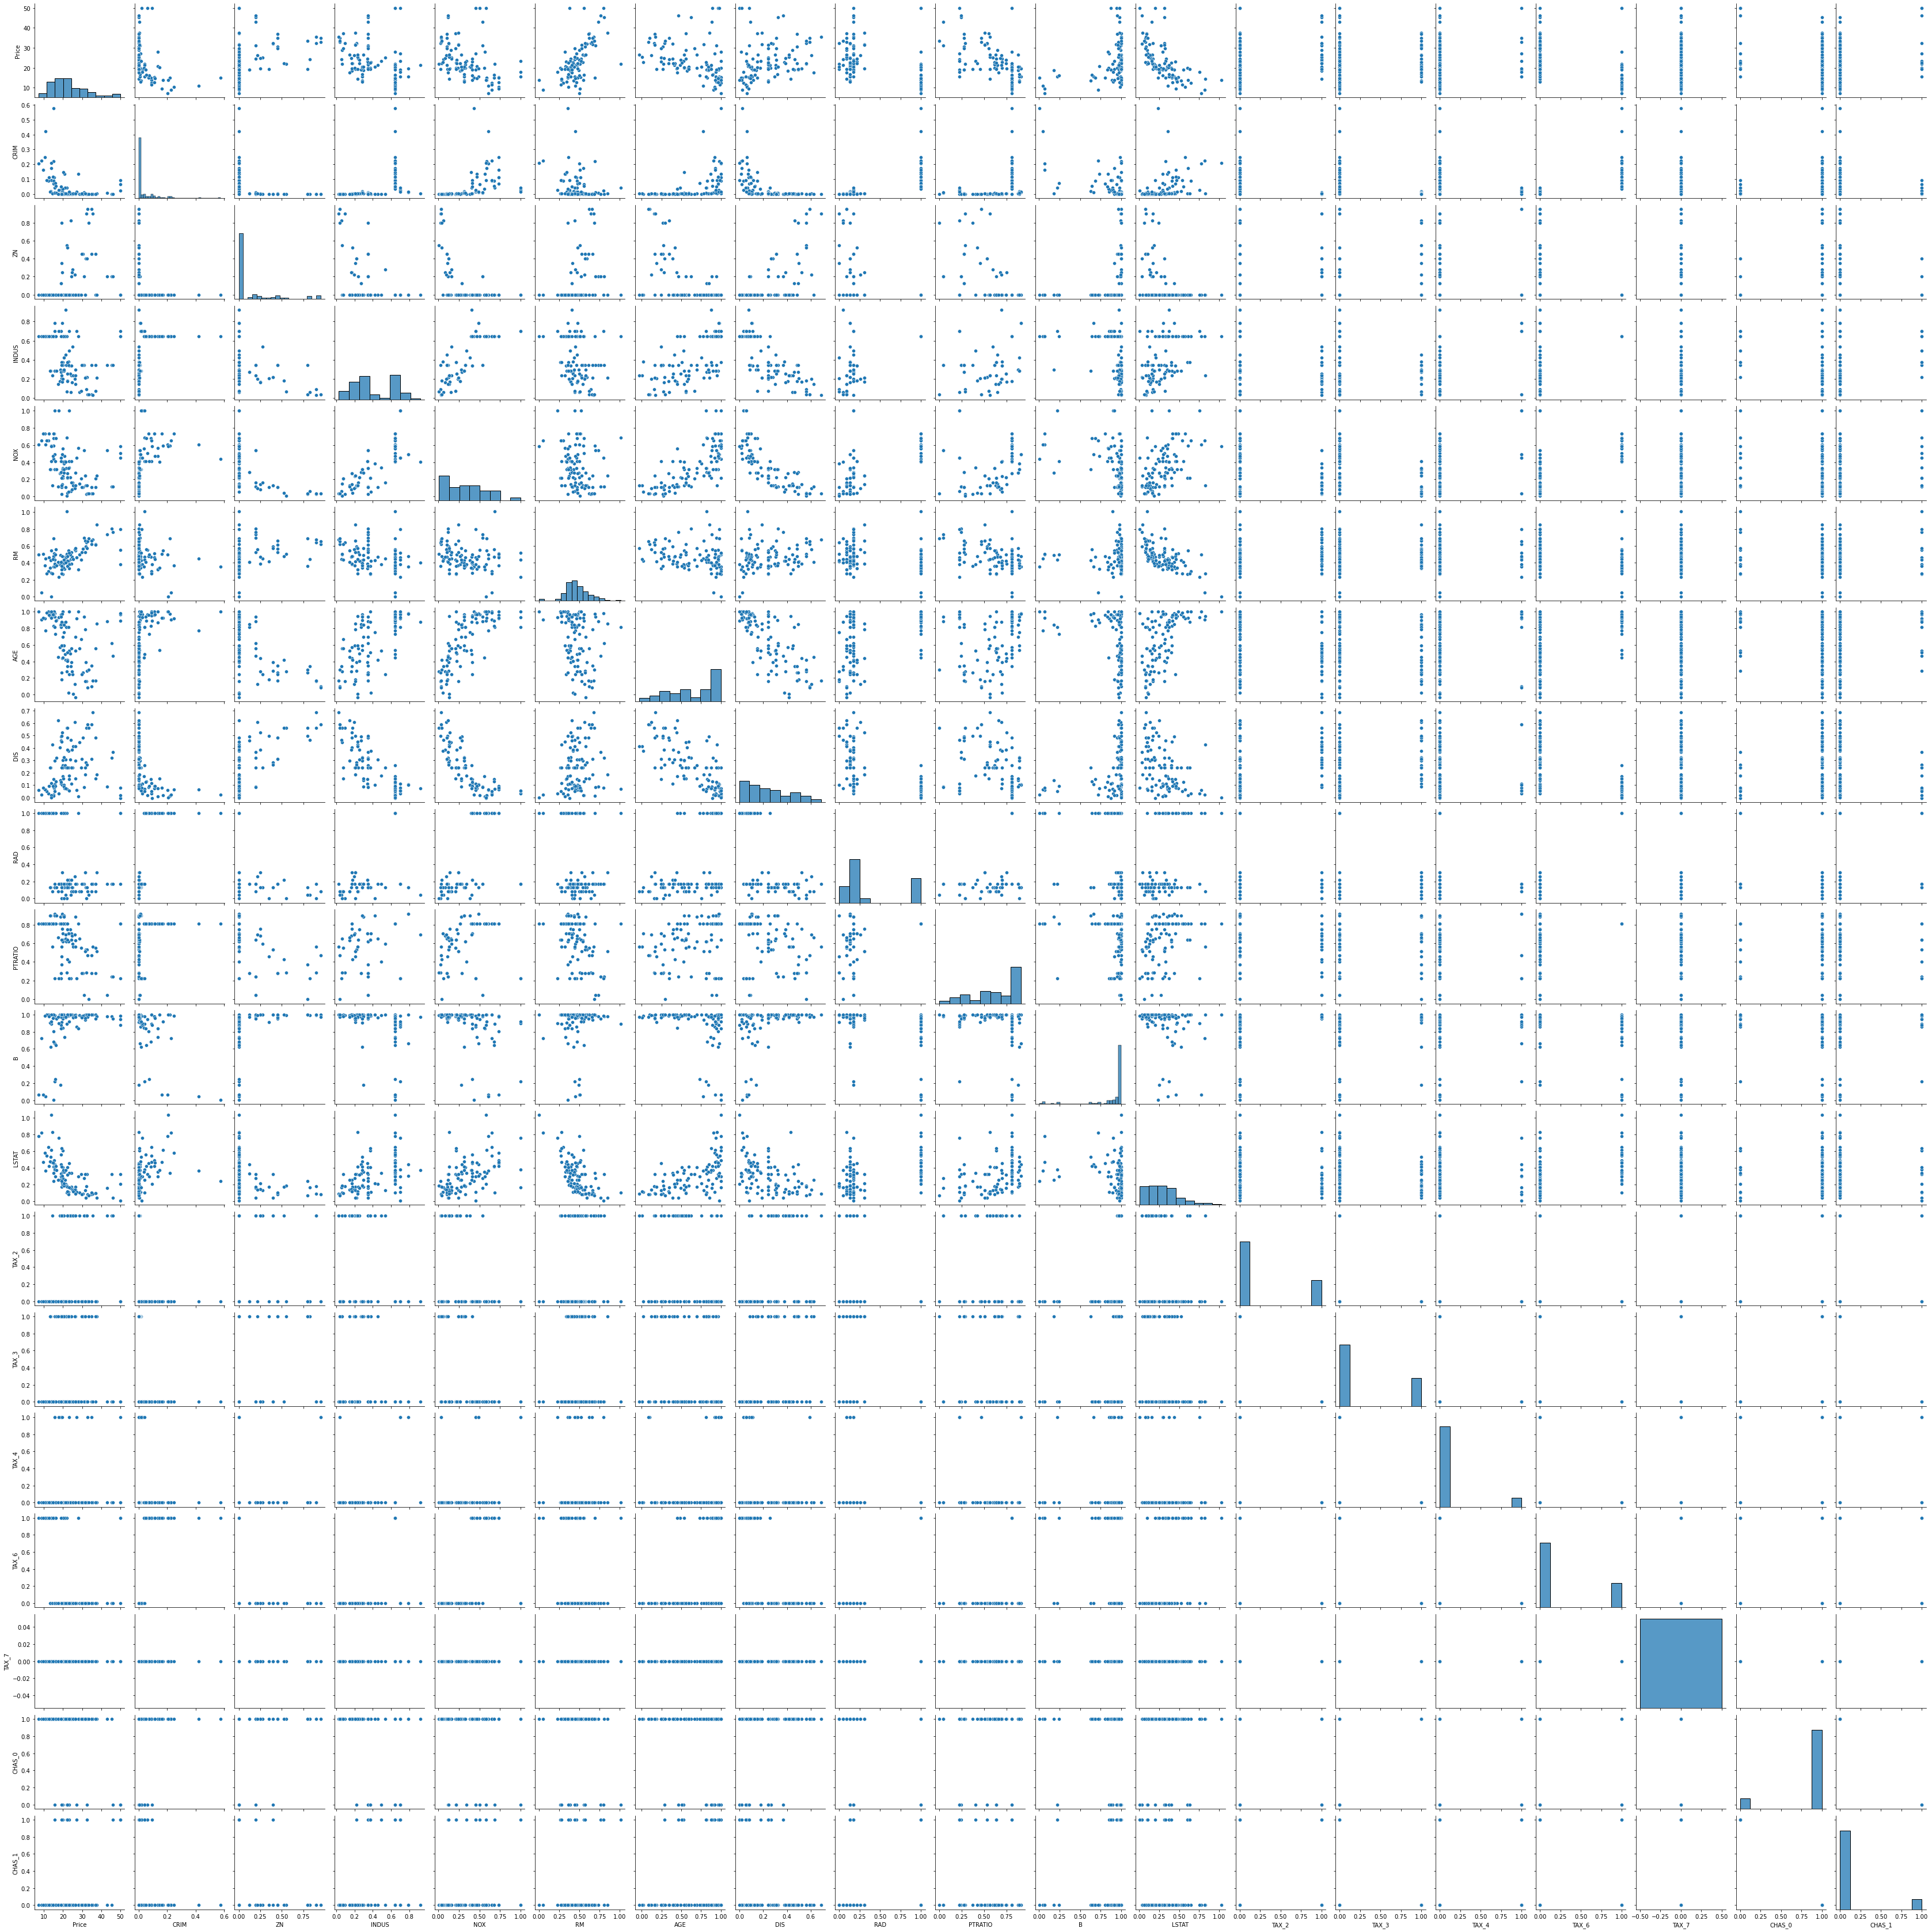

In [74]:
# seaborn 함수를 sns로 사용하여 pairplot 그리기
sns.pairplot(YX_test)
plt.show()

## 회귀분석으로 종속변수와 독립변수 관계 정량적으로 추정하기

In [75]:
# 모든 X_train 데이터의 값들의 통계량을 확인하기
X_train_fes.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,0.04,0.10,0.00,0.00,0.00,0.04,1.00
ZN,404.00,0.11,0.23,0.00,0.00,0.00,0.12,1.00
INDUS,404.00,0.41,0.25,0.00,0.20,0.35,0.65,1.00
NOX,404.00,0.35,0.24,0.00,0.14,0.31,0.49,1.00
RM,404.00,0.47,0.15,0.00,0.38,0.45,0.54,1.00
AGE,404.00,0.67,0.30,0.00,0.42,0.76,0.94,1.00
DIS,404.00,0.24,0.19,0.00,0.08,0.18,0.36,1.00
RAD,404.00,0.37,0.38,0.00,0.13,0.17,1.00,1.00
PTRATIO,404.00,0.62,0.23,0.00,0.51,0.69,0.81,1.00
B,404.00,0.90,0.22,0.00,0.95,0.99,1.00,1.00


In [76]:
# 모든 X_train 데이터의 값들이 숫자로 반영되었는지 확인하기
X_train_fes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 203 to 365
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   NOX      404 non-null    float64
 4   RM       404 non-null    float64
 5   AGE      404 non-null    float64
 6   DIS      404 non-null    float64
 7   RAD      404 non-null    float64
 8   PTRATIO  404 non-null    float64
 9   B        404 non-null    float64
 10  LSTAT    404 non-null    float64
 11  TAX_2    404 non-null    float64
 12  TAX_3    404 non-null    float64
 13  TAX_4    404 non-null    float64
 14  TAX_6    404 non-null    float64
 15  TAX_7    404 non-null    float64
 16  CHAS_0   404 non-null    float64
 17  CHAS_1   404 non-null    float64
dtypes: float64(18)
memory usage: 60.0 KB


In [77]:
# statsmodels.api를 sm 이름으로 호출하고,
# 데이터 전체의 왜곡을 줄이기 위해 Y절편 또는 상수항을 출력을 위한 상수 변수를 추가
import statsmodels.api as sm

X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
X_test_fes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 410 to 467
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   const    102 non-null    float64
 1   CRIM     102 non-null    float64
 2   ZN       102 non-null    float64
 3   INDUS    102 non-null    float64
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    float64
 9   PTRATIO  102 non-null    float64
 10  B        102 non-null    float64
 11  LSTAT    102 non-null    float64
 12  TAX_2    102 non-null    float64
 13  TAX_3    102 non-null    float64
 14  TAX_4    102 non-null    float64
 15  TAX_6    102 non-null    float64
 16  TAX_7    102 non-null    float64
 17  CHAS_0   102 non-null    float64
 18  CHAS_1   102 non-null    float64
dtypes: float64(19)
memory usage: 15.9 KB


In [78]:
# 회귀분석 실행하고 model 변수에 저장하기
# model 변수의 결과를 요약 출력하기
model_lr = sm.OLS(Y_train, X_train_fes).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.71e-105
Time:                        00:03:10   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1290      2.030      8.439      0.000      13.138      21.120
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0         7.7912      1.035      7.528      0.000       5.756       9.826
CHAS_1         9.3378      1.235      7.559      0.000       6.909      11.767
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 학습된 회귀분석으로 과거/현재/미래 예측하기

In [79]:
# 학습된 모델을 사용하여 X_train 값 예측하기
model_lr.predict(X_train_fes)

203   40.40
441   18.21
172   21.04
95    27.31
54    17.58
       ... 
98    34.08
476   21.18
322   22.03
382   12.87
365   21.97
Length: 404, dtype: float64

In [80]:
# 학습된 모델을 사용하여 X_train 값 예측하고 DataFrame 형식으로 바꾸며 컬럼 이름은 'Pred'로 출력하기
pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])

,Pred
203,40.40
441,18.21
172,21.04
95,27.31
54,17.58
...,...
98,34.08
476,21.18
322,22.03
382,12.87


In [81]:
# 학습된 모델을 사용하여 X_train 및 X_test 값 예측하고 변수로 저장
Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])

In [82]:
# 실제 Y_train과 예측치인 Y_trpred 붙여서 비교하기
pd.concat([Y_train, Y_trpred], axis=1)

,Price,Pred
203,48.50,40.40
441,17.10,18.21
172,23.10,21.04
95,28.40,27.31
54,18.90,17.58
...,...,...
98,43.80,34.08
476,16.70,21.18
322,20.40,22.03
382,11.30,12.87


In [83]:
# 실제 Y_test과 예측치인 Y_tepred 붙여서 비교하기
pd.concat([Y_test, Y_tepred], axis=1)

,Price,Pred
410,15.00,11.03
85,26.60,26.93
280,45.40,36.55
422,20.80,16.02
199,34.90,32.45
...,...,...
229,31.50,28.35
159,23.30,25.14
196,33.30,36.58
345,17.50,16.81


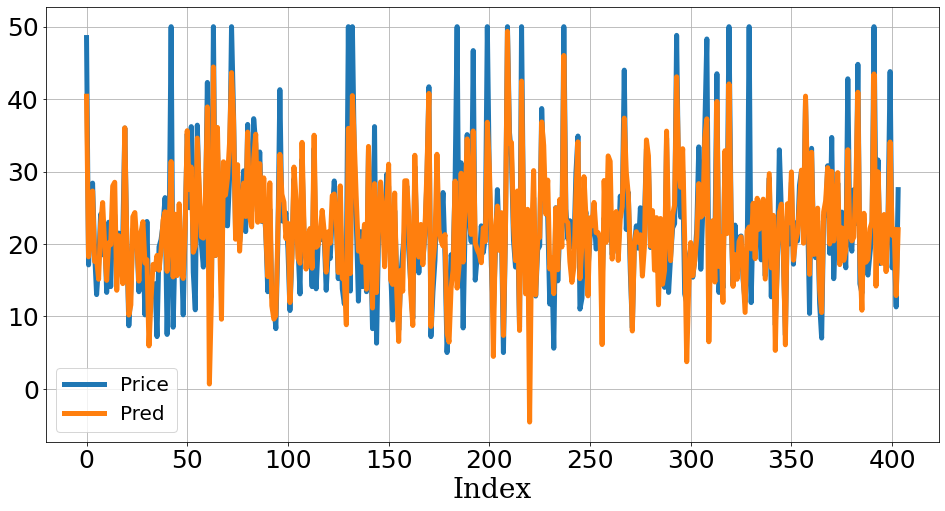

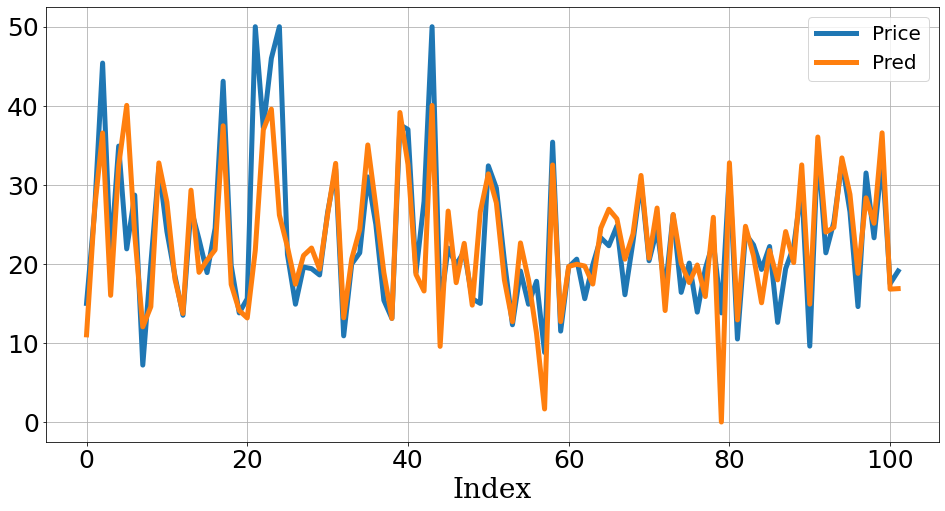

In [84]:
# 실제 Y와 예측치 시각화
def plot_prediction(Y_true_pred):
    plt.figure(figsize=(16, 8))
    plt.plot(Y_true_pred, linewidth=5, label=Y_true_pred.columns)
    plt.xticks(fontsize=25, rotation=0)
    plt.yticks(fontsize=25)
    plt.xlabel('Index', fontname='serif', fontsize=28)
    plt.legend(fontsize=20)
    plt.grid()
    plt.show()
    
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

## **코드 정리:** 전처리 + 모델링

In [85]:
# 실제 Y와 예측치 시각화
def plot_prediction(Y_true_pred):
    plt.figure(figsize=(16, 8))
    plt.plot(Y_true_pred, linewidth=5, label=Y_true_pred.columns)
    plt.xticks(fontsize=25, rotation=0)
    plt.yticks(fontsize=25)
    plt.xlabel('Index', fontname='serif', fontsize=28)
    plt.legend(fontsize=20)
    plt.grid()
    plt.show()

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.71e-105
Time:                        00:03:11   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1290      2.030      8.439      0.000      13.138      21.120
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0         7.7912      1.035      7.528      0.000       5.756       9.826
CHAS_1         9.3378      1.235      7.559      0.000       6.909      11.767
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

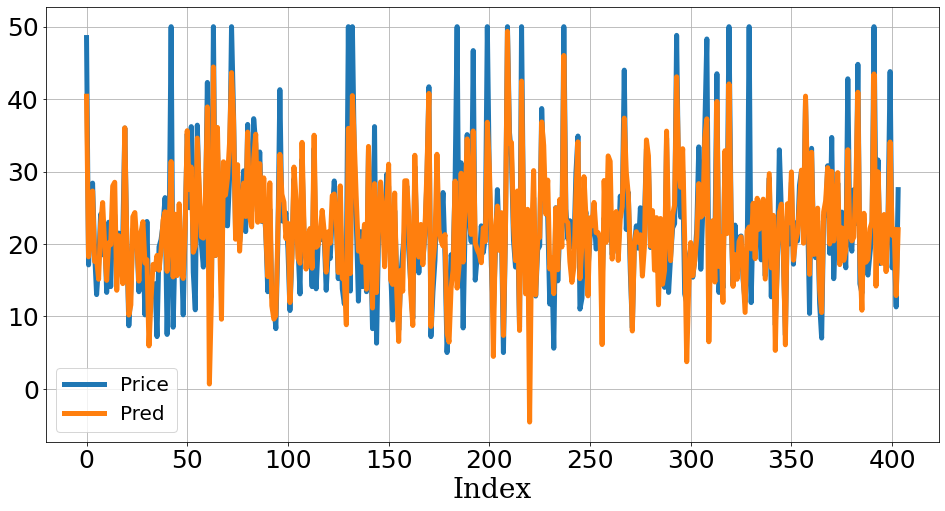

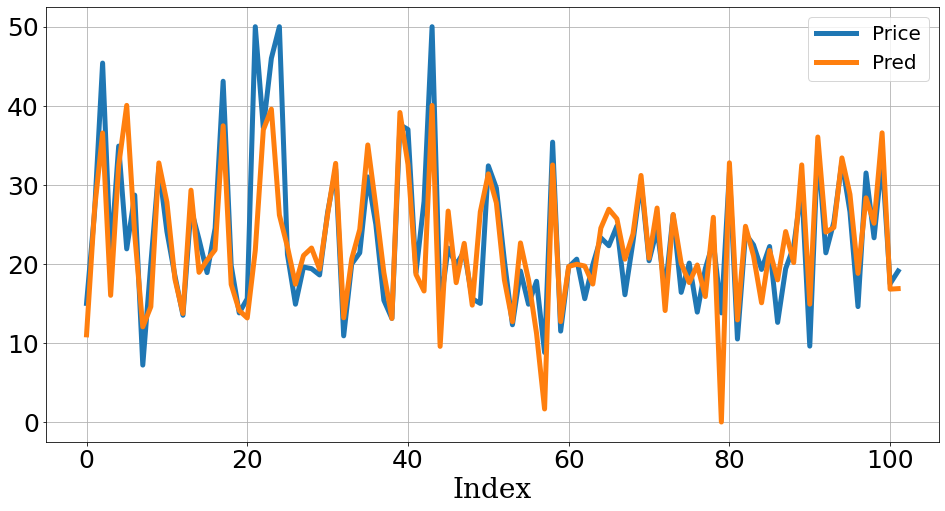

In [86]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
model_lr = sm.OLS(Y_train, X_train_fes).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# **Evaluation:** 분석 성능 확인/평가하기 

**1) 예측문제 검증지표:** `MSE, MSPE, RMSE, RMSLE, MAE, MAPE, MPE, R^2, Adjusted R^&2, ...` (Y의 범위가 무한대가 가능한 연속형일때)

<center><img src='Image/Advanced/Evaluation_Metric1.jpg' width='300'></center>  
    
<center><img src='Image/Advanced/Evaluation_Metric2.jpg' width='300'>(Mean Absolute Error)</center>  
    
<center><img src='Image/Advanced/Evaluation_Metric3.jpg' width='300'>(Mean Squared Error)</center>  
    
<center><img src='Image/Advanced/Evaluation_Metric4.jpg' width='300'>(Mean Absolute Percentage Error)</center>  
    
<center><img src='Image/Advanced/Evaluation_Metric5.jpg' width='250'>(Mean Percentage Error)</center>

- **사용예시:** [Comparison of Algorithm Performance Metrics](https://www.researchgate.net/figure/Model-performances-based-on-the-MAE-MAPE-RMSE-MSE-and-R-2-metrics-Italic-and-bold_tbl3_354075433)

---

**2) 회귀분석 알고리즘 적합/추정 후 결과지표:** `추정성능(빨간색)` + `잔차진단(보라색)`

<center><img src='Image/Advanced/Statmodels_OLS_Result2.png' width='600'></center>

---

**2-1) R-squared(R^2):** 추정된 모형이 데이터에 잘 적합된 정도, $(- \infty, 1]$  

> **"`TSS = ESS + RSS`"**
> - **TSS(Total Sum of Squares):** `실제 종속변수` $Y$의 움직임 범위
> - **ESS(Explained Sum of Squares):** `예측된 종속변수` $\hat{Y}$의 움직임 범위
> - **RSS(Residual Sum of Squares):** `잔차` $\epsilon$의 움직임 범위
>> - **"예측값의 움직임 범위 <<< 실제 움직임 범위보다 클 수 없음"**
>> - **"예측 성능이 좋을수록 예측값의 움직임 범위는 실제 움직임 범위와 비슷해짐"**

<center><img src='Image/Advanced/R2_decomposition1.png' width='600'></center>

$$
\begin{align*}
R^2 &= \dfrac{ESS}{TSS} = \dfrac{\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \\
&= \text{종속변수 움직임 범위 대비 예측변수 움직임 범위도 비슷할수록 굳} \\
&= 1 - \dfrac{RSS}{TSS} = 1 - \dfrac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \\
&= \text{잔차 움직임 범위가 작을수록 굳}
\end{align*}
$$

<center><img src='Image/Advanced/R2_decomposition2.png' width='600'></center>

---

**2-2) t-검정:** 추정계수가 `t분포`의 움직임을 보이기 때문에, `t분포` 기반 독립변수와 종속변수 간의 `영향력정도 의사결정`

- **추정계수의 분포:**

\begin{align*}
\text{Main Equation} && \hat{W} &= (X^TX)^{-1} X^T Y \\
&& &= (X^TX)^{-1} X^T (X W + \epsilon) \\
&& &= W + (X^TX)^{-1} X^T \epsilon \\
\text{Expectation} && \text{E}(\hat{W}) &=  \text{E}( W + (X^TX)^{-1} X^T \epsilon ) \\
&& &=  W + (X^TX)^{-1} X^T \text{E}( \epsilon ) \\
&& &= W \\
\text{Variance} && \text{Var}(\hat{W}_i)  &= \left( \text{Cov}(\hat{W}) \right)_{ii} \;\; (i=0, \ldots, K-1) \\
\text{Covariance} && \text{Cov}(\hat{W}) &= E\left((\hat{W} - W)(\hat{W} - W)^T \right) \\
&& &= E\left(((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T \right) \\
&& &= E\left((X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} \right) \\
&& &= (X^TX)^{-1} X^T E(\epsilon \epsilon^T) X(X^TX)^{−1} \\
&& &= (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&& &= \sigma^2  (X^TX)^{-1} \\
\text{Standard Deviation} && \sqrt{\text{Var}(\hat{W}_i)} \approx {se_{\hat{W}_i}} &= \sqrt{\sigma^2 \big((X^TX)^{-1}\big)_{ii}} \;\; (i=0, \ldots, K-1) \\
\text{Asymptotic} && \dfrac{\hat{W}_i - W_i}{se_{\hat{W}_i}} &\sim t_{N-K} \;\; (i=0, \ldots, K-1) \\
\end{align*}

- **검정통계량(t-통계량) 의미:**

$$t = \dfrac{\hat{W}_i - W_i}{se_{\hat{W}_i}} = \dfrac{\hat{W}_i - 0}{se_{\hat{W}_i}} = \dfrac{\hat{W}_i}{se_{\hat{W}_i}}$$
    
> - $t$ 값이 `작으면`, 독립변수와 종속변수의 상관성이 `없다`  
> - $t$ 값이 `크면`, 독립변수와 종속변수의 상관성이 `있다`

- **의사결정:**

> **(1) 가설확인**
>> - **대중주장(귀무가설, Null Hypothesis, $H_0$)** 
>>
>> : $W_i = 0$ 
>>
>> : 독립변수와 종속변수의 상관관계(선형관계)가 `없다`
>>
>> - **나의주장(대립가설, Alternate Hypothesis, $H_1$)**  
>>
>> : $W_i \neq 0$ 
>>
>> : 독립변수와 종속변수의 상관관계(선형관계)가 `있다`
>>
> **(2) 유의수준 설정 및 유의확률 확인**
>> - 유의수준: 5% (0.05) 분석가가 알아서 결정
>> - 유의확률(p-value): 컴퓨터가 알아서 추정
>
> **(3) 의사결정**
>> - **p-value >= 유의수준:** `대중주장 참`  
>>
>> : 독립변수와 종속변수의 상관관계(선형관계)가 `없다`
>>
>> : 분석한 변수는 모델링에 영향력이 `없다`
>>
>> - **p-value < 유의수준:** `나의주장 참`  
>>
>> : 독립변수와 종속변수의 상관관계(선형관계)가 `있다`
>>
>> : 분석한 변수는 모델링에 영향력이 `있다`

---

**2-3) F검정:** `전체 계수`에 대한 $ESS/RSS$가 `F분포`의 움직임을 보이기 때문에, `F분포` 기반 독립변수와 종속변수 간의 `알고리즘 신뢰성 의사결정`

- **필요성:** 
> - `변수의 갯수`와 크기가 커지면 잔차제곱합(Residula Sum of Square)이 `무조건 감소`
> - `분산 분석(Analysis of Variance(ANOVA))`은 종속변수의 분산과 모든 독립변수의 분산간의 관계를 사용하여 `F분포` 기준 알고리즘 성능 평가  

- **검정통계량(F-통계량):** `분산분석표(ANOVA Table)`를 통해 쉽게 계산되며, $T$는 데이터의 갯수, $K$는 변수의 갯수

$$\dfrac{ESS}{K-1} \div \dfrac{RSS}{T-K} \sim F(K-1, T-K)$$

| Source | Degree of Freedom | Sum of Square | Mean Square | F test-statstics | p-value |
|:--:|:--:|:--:|:--:|:--:|:--:|
| Estimation | $$K-1$$ | $$ESS$$ | $$\sigma_{\hat{Y}}^2 = \dfrac{ESS}{K-1}$$ | $$F = \dfrac{\sigma_{\hat{Y}}^2}{\sigma_{\epsilon}^2}$$ | $$p-value$$ |
| Residual | $$T-K$$ | $$RSS$$ | $$\sigma_{\epsilon}^2 = \dfrac{RSS}{T-K}$$ |  |  |
| Total | $$T-1$$ | $$TSS$$ | $$\sigma_{Y}^2 = \dfrac{TSS}{T-1}$$ |  |  |
| $$R^2$$ |  | $$\dfrac{ESS}{TSS}$$ |  |  |  |

- **의사결정:**

> **(1) 가설확인**
> - **대중주장(귀무가설, Null Hypothesis, $H_0$)** 
>>
>> : $W_0  = W_1 = \cdots = W_{K-1} = 0$ 
>>
>> : 모형은 아무 효과가 `없다`
>>
>> : $R^2$ = 0
>>
>> - **나의주장(대립가설, Alternate Hypothesis, $H_1$)**  
>>
>> : $W_0  \neq W_1 \neq \cdots \neq W_{K-1} \neq 0$ 
>>
>> : 모형은 아무 효과가 `있다`
>>
>> : $R^2 \neq 0$
>
> **(2) 유의수준 설정 및 유의확률 확인**
>> - 유의수준: 5% (0.05) 분석가가 알아서 결정
>> - 유의확률(p-value): 컴퓨터가 알아서 추정
>
> **(3) 의사결정**
>> - **p-value >= 유의수준:** `대중주장 참`  
>>
>> : 분석한 모델링은 효과가 `없다`
>>
>> : 모델은 데이터 패턴을 잘 `추정하지 못한다`
>>
>> - **p-value < 유의수준:** `나의주장 참`  
>>
>> : 분석한 모델링은 효과가 `있다`
>>
>> : 모델은 데이터 패턴을 잘 `추정한다`
 
---

**2-4) 정보량기준(Information Criterion):** `회귀분석` 외에도 `다양한 알고리즘`에 활용, `값이 작을수록 좋은 모형결과` (`Likelihood`는 `클수록 좋은 모형결과`)

> - **[AIC(Akaike Information Criterion)](https://en.wikipedia.org/wiki/Akaike_information_criterion)**  
>
> : 모형과 데이터 확률분포의 Kullback-Leibler 수준을 가장 크게하기 위한 시도 
>
> $$AIC = -2log(L) + 2K$$
>
> <center>($L$: likelihood, $K$: 추정할 파라미터의 수(column수))</center>

> - **[BIC(Bayesian Information Criterion)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)**  
>
> : 데이터가 exponential family라는 가정하에 데이터에서 모형의 likelihood를 측정하기 위한 값에서 유도 
>
> $$BIC = -2log(L) + Klog(T)$$
>
> <center>($L$: likelihood, $K$: 추정할 파라미터의 수(column수), $T$: 데이터의 수(row수))</center>

> - **사용 예시:**
>
> <center><img src='Image/Advanced/AIC_BIC.gif' width='600'></center>

In [87]:
# MSE 값을 계산하여 하나의 숫자로 Train 데이터에서 알고리즘의 예측 성능을 표현하기
import numpy as np

np.mean((Y_trpred.values - Y_train.values)**2)

21.0518931149595

In [88]:
# Test 데이터에서도 MSE 출력하기
np.mean((Y_tepred.values - Y_test.values)**2)

31.34487209579984

In [89]:
# MSE 정리하기
Y_train_score = np.mean((Y_trpred.values - Y_train.values)**2)
Y_test_score = np.mean((Y_tepred.values - Y_test.values)**2)
MSE = pd.DataFrame([Y_train_score, Y_test_score], columns=['MSE'], index=['Train', 'Test'])
MSE

,MSE
Train,21.05
Test,31.34


In [90]:
# 함수를 사용하여 MSE 출력하기
mean_squared_error(Y_train, Y_trpred)

21.0518931149595

In [91]:
# 함수를 사용하여 MAE 출력하기
mean_absolute_error(Y_train, Y_trpred)

3.065037339828882

In [92]:
# 함수를 사용하여 MAPE 출력하기
mean_absolute_percentage_error(Y_train, Y_trpred)

0.16332457561874042

In [93]:
# MSE, MAE, MAPE 정리
MAE = mean_absolute_error(Y_train, Y_trpred)
MSE = mean_squared_error(Y_train, Y_trpred)
MAPE = mean_absolute_percentage_error(Y_train, Y_trpred)
pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,3.07,21.05,0.16


In [94]:
# 마찬가지로 Test 데이터의 성능 확인하기
MAE = mean_absolute_error(Y_test, Y_tepred)
MSE = mean_squared_error(Y_test, Y_tepred)
MAPE = mean_absolute_percentage_error(Y_test, Y_tepred)
pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,3.51,31.34,0.17


## **코드 정리:** 전처리 + 모델링 + 검증

In [95]:
# 검증 함수화
def evaluation(Y_real, Y_pred):
    MAE = mean_absolute_error(Y_real, Y_pred)
    MSE = mean_squared_error(Y_real, Y_pred)
    MAPE = mean_absolute_percentage_error(Y_real, Y_pred)
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    
    return Score

# Train & Test 모두의 검증 함수화
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te):
    Score_tr = evaluation(Y_real_tr, Y_pred_tr)
    Score_te = evaluation(Y_real_te, Y_pred_te)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']

    return Score_trte

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.71e-105
Time:                        00:03:11   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1290      2.030      8.439      0.000      13.138      21.120
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0         7.7912      1.035      7.528      0.000       5.756       9.826
CHAS_1         9.3378      1.235      7.559      0.000       6.909      11.767
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

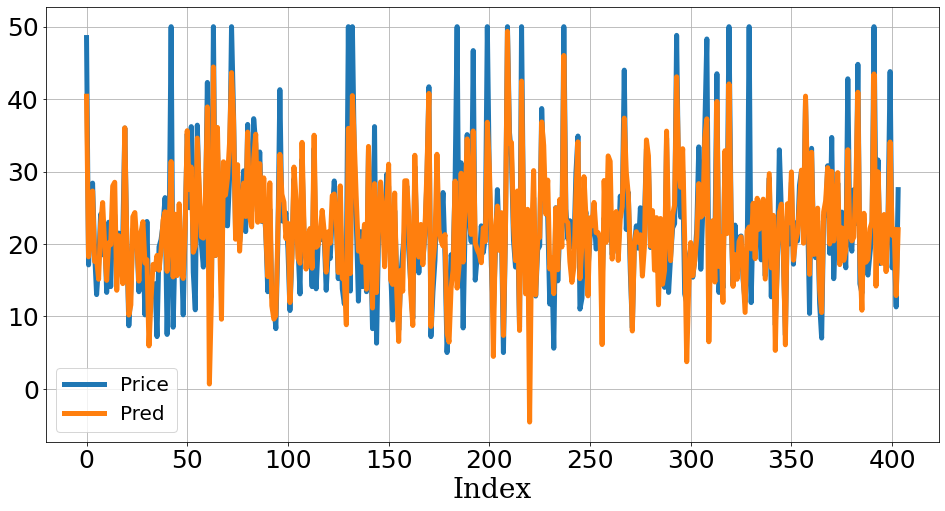

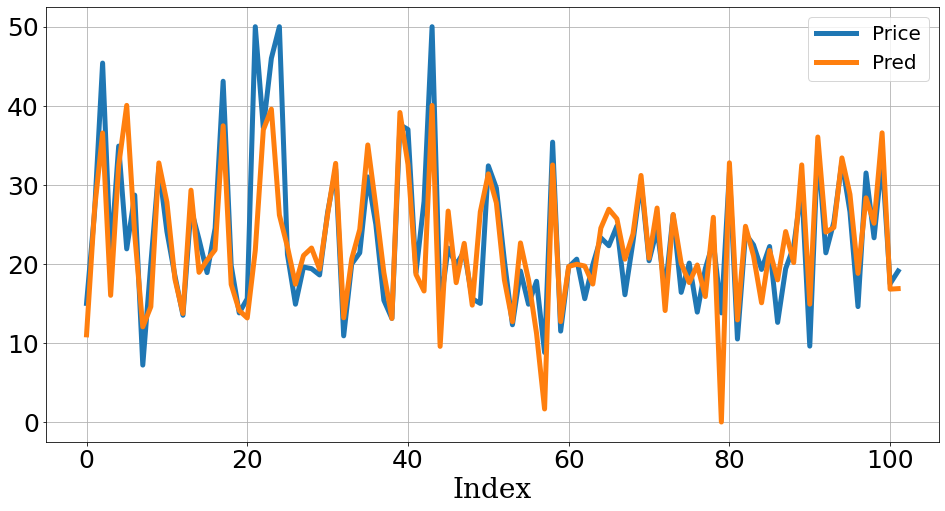

,MAE,MSE,MAPE
Train,3.07,21.05,0.16
Test,3.51,31.34,0.17


In [96]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
model_lr = sm.OLS(Y_train, X_train_fes).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score = evaluation_trte(Y_train, Y_trpred, Y_test, Y_tepred)
Score

# **Error Analysis:** 분석 성능/종료 판단하기

- **회귀분석 알고리즘 적합/추정 후 결과지표:** `추정성능(빨간색)` + `잔차진단(보라색)`

<center><img src='Image/Advanced/Statmodels_OLS_Result2.png' width='600'></center>

---

**0) 검증지표 vs 잔차진단:** Y수치 비교가 가능한 `예측문제`에서 Y라벨이 있는 `지도학습`에 적용 가능

<br>
<center><img src='Image/Advanced/Evaluation_Residual.png' width='800'></center>

---

**1) 잔차진단의 2가지 목적:**

> **"`예측 성능`도 중요하지만(추정성능), 추정/분석 이후 `데이터의 패턴이 모델링에 잘 반영되었는지`(잔차진단) 평가하는 것도 중요"**
>
> (1) 추가할만한 `데이터 전처리` 또는 다른 `모델링의 대안` 파악
>> - 잔차에 `남아있는 패턴`을 전처리 단계에서 `추가 반영` 가능
>> - 잔차의 남은 패턴으로 `다른 분석 알고리즘 고려` 가능
>
> (2) 분석 시작은 여러분들이 시작했지만, `분석 종료`는 `잔차 진단`이 알려줌
>> - 잔차의 남은 패턴이 없다는 것은 `모델링이 데이터의 패턴을 최대한 반영` 의미
>> - 모델링으로 더이상 할 수 있는 것들이 없으니 `분석을 마무리` 해도 됨을 의미

---

**2) 잔차진단의 목표: 잔차가 `백색잡음`과 얼마나 유사한지 측정**

- 모델링에 데이터의 패턴이 잘 반영 되었다면, 추정 후의 `잔차`에는 아무 패턴도 없어야 함
- `잔차`에 아무런 패턴도 남아있지 않은 경우 `백색잡음`의 형태로 분포
- `잔차 분석/진단`을 통해 잔차가 `백색잡음(White Noise)`라면 역으로 `모델링`에서 데이터의 패턴을 잘 반영하여 성능이 좋음을 의미

---

**3) 백색잡음:** 잔차가 백색잡음이 아니라면 `모델링으로 개선의 여지가 있음`을 의미  

<center><img src='Image/Advanced/White_Noise.png' width='450'></center>
    
> **(1) 잔차들은 `정규분포`이고, (unbiased) `평균 0이고 일정한 분산`을 가져야 함:** 
>
> $$
\begin{align*}
\{\epsilon_t : t = \dots, -1, 0, 1, \dots\} & \sim N(0,\sigma^2_{\epsilon_t}) \\
\text{where  } \epsilon_t & \sim \text{i.i.d(independent and identically distributed)} \\
\epsilon_t &= Y_t - \hat{Y_t} \\
E(\epsilon_t) &= 0 \\
Var(\epsilon_t) &= \sigma^2_{\epsilon_t} \\
Cov(\epsilon_s, \epsilon_k) &= 0 \text{ for different times!(s $\ne$ k)}
\end{align*}
$$
>
> **(2) 잔차들이 시간의 흐름에 따라 `상관성이 없어야` 함:** `자기상관함수(Autocorrelation Fundtion, ACF)=0` 확인
> - 공분산(Covariance): 
>
> <center>$Cov(Y_s, Y_k)$ = $E[(Y_s-E(Y_s))$$(Y_k-E(Y_k))]$ = $\gamma_{s,k}$</center>
>
> - 자기상관함수(Autocorrelation Function): 
>
> <center>$Corr(Y_s, Y_k)$ = $\dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}}$ = $\dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$</center>
>
> - 편자기상관함수(Partial Autocorrelation Function): $s$와 $k$사이의 `상관성을 제거한 자기상관함수`
>
> <center>$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})]$  for $1<t<k$</center>


In [97]:
# 잔차 추출하기
# 2차원끼리 빼기 1차원의 값으로 DataFrame 유지한 채 쉽게 연산 가능
Y_train - Y_trpred.values

,Price
203,8.10
441,-1.11
172,2.06
95,1.09
54,1.32
...,...
98,9.72
476,-4.48
322,-1.63
382,-1.57


In [98]:
# Train & Test 모두 잔차를 추출하고 변수 저장
# 각 변수의 column 이름은 'Error'로 변경
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

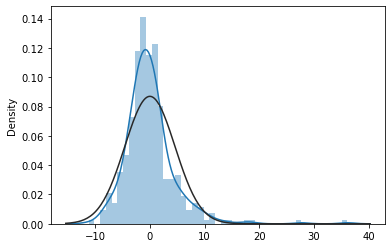

In [99]:
# 잔차의 정규본포성 확인
sns.distplot(Resid_tr, norm_hist='True', fit=stats.norm)
plt.show()

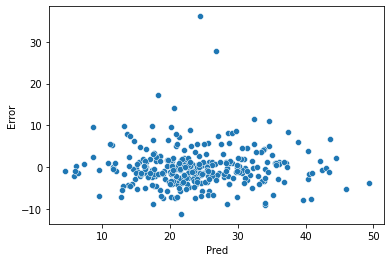

In [100]:
# 잔차의 등분산성 확인
temp = pd.concat([Y_trpred, Resid_tr.reset_index().iloc[:,[1]]], axis=1)
sns.scatterplot(x='Pred', y='Error', data=temp)
plt.show()

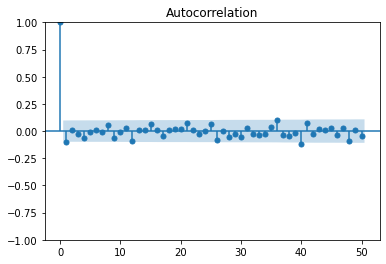

In [101]:
# 잔차의 자기상관성 확인
sm.graphics.tsa.plot_acf(Resid_tr, lags=50, use_vlines=True)
plt.show()

In [102]:
# 잔차의 정규분포, 자기상관, 등분산성을 통계량으로 확인
# 정규분포
# Null Hypothesis: The residuals are normally distributed
Normality = pd.DataFrame([stats.shapiro(Resid_tr)], 
                         index=['Normality'], columns=['Test Statistics', 'p-value']).T

# 등분산성
# Null Hypothesis: Error terms are homoscedastic
Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Resid_tr, X_train_fes.values, alternative='two-sided')],
                                  index=['Heteroscedasticity'], 
                                  columns=['Test Statistics', 'p-value', 'Alternative']).T

# 자기상관
# Null Hypothesis: Autocorrelation is absent
Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,0]),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,1])], axis=1).T
Autocorrelation.index = ['Test Statistics', 'p-value']
Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']

Error_Analysis = pd.concat([Normality, Heteroscedasticity, Autocorrelation], join='outer', axis=1)
Error_Analysis

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.86,0.73,9.18,50.77
p-value,0.00,0.03,0.51,0.44
Alternative,NaN,two-sided,NaN,NaN


## **코드 정리:** 전처리 + 모델링 + 검증 + 에러분석

In [103]:
# 에러 분석
def error_analysis(X_Data, Y_Pred, Residual, graph_on=False):
    if graph_on == True:
        ##### 시각화
        # 잔차의 정규본포성 확인
        sns.distplot(Residual, norm_hist='True', fit=stats.norm)
        plt.show()

        # 잔차의 등분산성 확인
        temp = pd.concat([Y_Pred, Residual.reset_index().iloc[:,[1]]], axis=1)
        sns.scatterplot(x='Pred', y='Error', data=temp)
        plt.show()
        
        # 잔차의 자기상관성 확인
        sm.graphics.tsa.plot_acf(Residual, lags=50, use_vlines=True)
        plt.show()

    ##### 통계량
    # 정규분포
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Residual)], 
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # 등분산성
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Residual, X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], 
                                      columns=['Test Statistics', 'p-value', 'Alternative']).T
    
    # 자기상관
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,0]),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,1])], axis=1).T
    Autocorrelation.index = ['Test Statistics', 'p-value']
    Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']
    
    Error_Analysis = pd.concat([Normality, Heteroscedasticity, Autocorrelation], join='outer', axis=1)
    
    return Error_Analysis

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.71e-105
Time:                        00:03:12   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1290      2.030      8.439      0.000      13.138      21.120
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0         7.7912      1.035      7.528      0.000       5.756       9.826
CHAS_1         9.3378      1.235      7.559      0.000       6.909      11.767
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

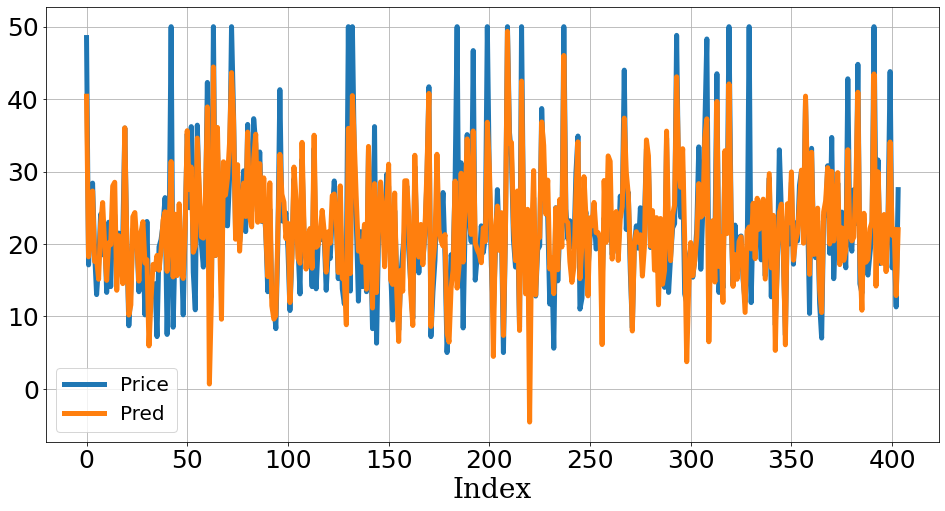

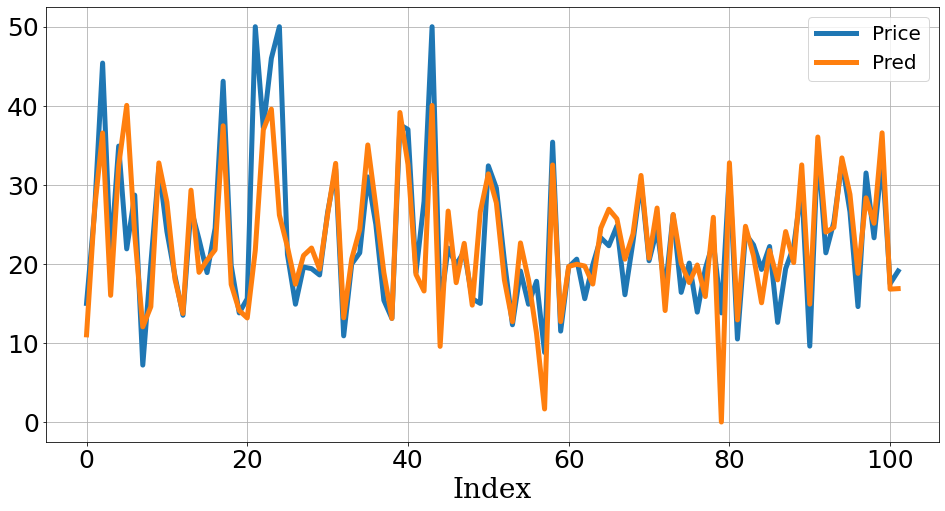

,MAE,MSE,MAPE
Train,3.07,21.05,0.16
Test,3.51,31.34,0.17


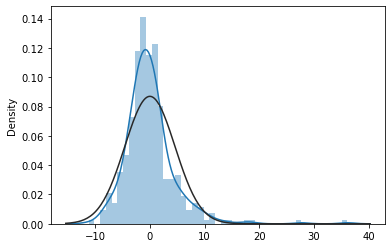

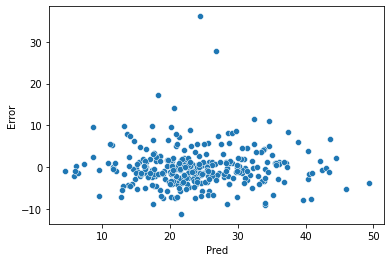

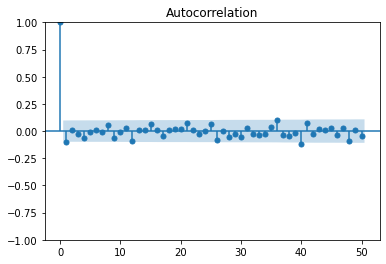

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.86,0.73,9.18,50.77
p-value,0.00,0.03,0.51,0.44
Alternative,NaN,two-sided,NaN,NaN


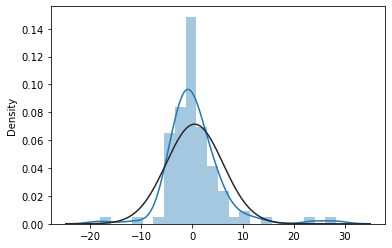

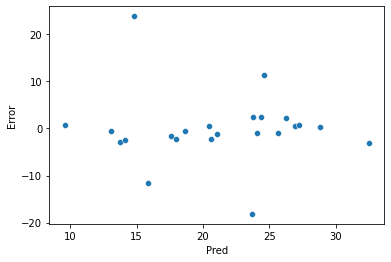

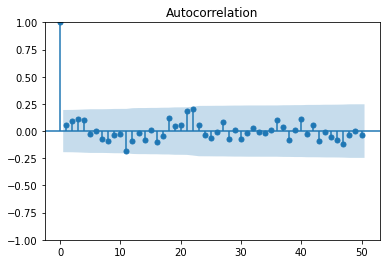

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.83,0.13,9.18,50.77
p-value,0.00,0.00,0.51,0.44
Alternative,NaN,two-sided,NaN,NaN


In [104]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
model_lr = sm.OLS(Y_train, X_train_fes).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score = evaluation_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

# **Summary:** 분석단계 이해도 낮은 부분 확인

**1) 데이터 핸들링**  

**2) 단계이해**  
> **(1) `Import Library`**
>
> **(2) `Data Loading`**   
>
> **(3) `Preprocessing`**   
>
> **(4) `Applying Base Algorithm`**   
>
> **(5) `Evaluation`**  
>
> **(6) `Error Analysis`**  

**3) 결과 해석**  

## 분석가 정의 함수

In [105]:
# 자료형 변환 + 결측값 처리
def prep(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df


# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


# 데이터 변환
def feature_engineering(df_origin):
    df = df_origin.copy()
    
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 100:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)
        
    if 'TAX' in df.columns:
        df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
        df = pd.concat([df, df_dummy], axis=1)
        del df['TAX']

    if 'CHAS' in df.columns:
        df['CHAS'] = df['CHAS'].astype(int)
        df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
        df = pd.concat([df, df_dummy], axis=1)
        del df['CHAS']
    
    return df


# 데이터 변환 후 X_train과 X_test의 변수 갯수 일치
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # Train & Test 변수명 체크
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # 변수 갯수 일치
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling


# 실제 Y와 예측치 시각화
def plot_prediction(Y_true_pred):
    plt.figure(figsize=(16, 8))
    plt.plot(Y_true_pred, linewidth=5, label=Y_true_pred.columns)
    plt.xticks(fontsize=25, rotation=0)
    plt.yticks(fontsize=25)
    plt.xlabel('Index', fontname='serif', fontsize=28)
    plt.legend(fontsize=20)
    plt.grid()
    plt.show()


# 검증 함수화
def evaluation(Y_real, Y_pred):
    MAE = mean_absolute_error(Y_real, Y_pred)
    MSE = mean_squared_error(Y_real, Y_pred)
    MAPE = mean_absolute_percentage_error(Y_real, Y_pred)
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    
    return Score

# Train & Test 모두의 검증 함수화
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te):
    Score_tr = evaluation(Y_real_tr, Y_pred_tr)
    Score_te = evaluation(Y_real_te, Y_pred_te)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']

    return Score_trte


# 에러 분석
def error_analysis(X_Data, Y_Pred, Residual, graph_on=False):
    if graph_on == True:
        ##### 시각화
        # 잔차의 정규본포성 확인
        sns.distplot(Residual, norm_hist='True', fit=stats.norm)
        plt.show()

        # 잔차의 등분산성 확인
        temp = pd.concat([Y_Pred, Residual.reset_index().iloc[:,[1]]], axis=1)
        sns.scatterplot(x='Pred', y='Error', data=temp)
        plt.show()
        
        # 잔차의 자기상관성 확인
        sm.graphics.tsa.plot_acf(Residual, lags=50, use_vlines=True)
        plt.show()

    ##### 통계량
    # 정규분포
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Residual)], 
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # 등분산성
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Residual, X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], 
                                      columns=['Test Statistics', 'p-value', 'Alternative']).T
    
    # 자기상관
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,0]),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr, lags=[10,50]).iloc[:,1])], axis=1).T
    Autocorrelation.index = ['Test Statistics', 'p-value']
    Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']
    
    Error_Analysis = pd.concat([Normality, Heteroscedasticity, Autocorrelation], join='outer', axis=1)
    
    return Error_Analysis

## 전처리 미반영 분석결과

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              770.7
Date:                Mon, 17 Oct 2022   Prob (F-statistic):                   2.81e-269
Time:                        00:03:13   Log-Likelihood:                         -1197.5
No. Observations:                 404   AIC:                                      2421.
Df Residuals:                     391   BIC:                                      2473.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1127      0.035     -3.179      0.002      -0.182      -0.043
ZN             0.0384      0.015      2.517      0.012       0.008       0.068
INDUS          0.0397      0.069      0.580      0.562      -0.095       0.174
CHAS           1.3727      1.052      1.305      0.193      -0.696       3.441
NOX           -8.0580      3.570     -2.257      0.025     -15.077      -1.039
RM             7.2127      0.316     22.795      0.000       6.591       7.835
AGE           -0.0301      0.015     -2.043      0.042      -0.059      -0.001
DIS           -1.0721      0.208     -5.159      0.000      -1.481      -0.664
RAD            0.1845      0.069      2.656      0.008       0.048       0.321
TAX           -0.0108      0.004     -2.651      0.008      -0.019      -0.003
PTRATIO       -0.6505      0.119     -5.485      0.000      -0.884      -0.417
B              0.0133      0.003      4.445      0.000       0.007       0.019
LSTAT         -0.2352      0.055     -4.286      0.000      -0.343      -0.127
==============================================================================
Omnibus:                      245.319   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3412.507
Skew:                           2.310   Prob(JB):                         0.00
Kurtosis:                      16.468   Cond. No.                     8.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

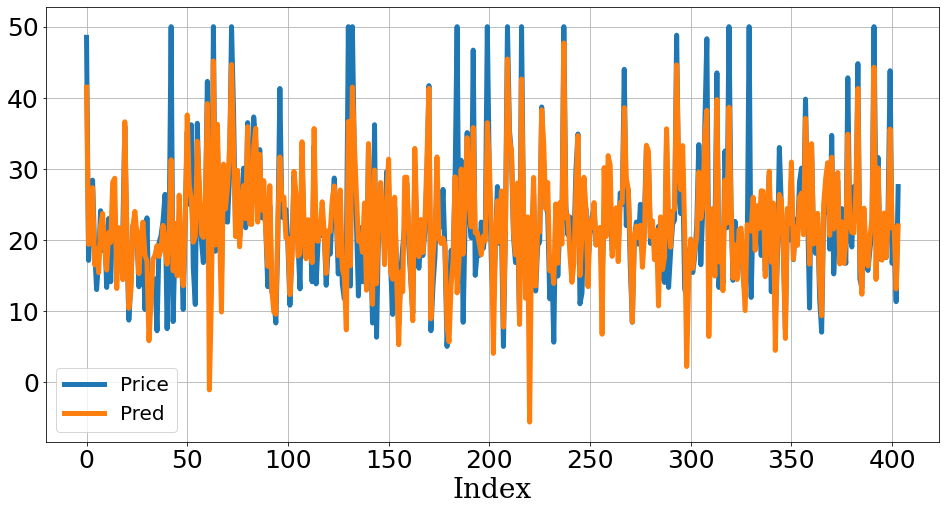

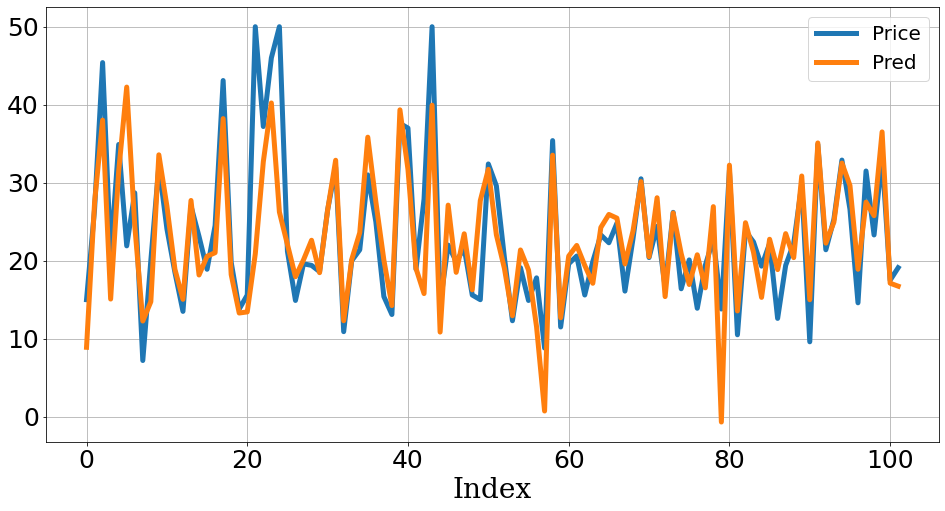

,MAE,MSE,MAPE
Train,3.11,21.99,0.17
Test,3.64,34.08,0.18


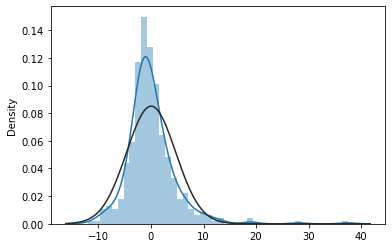

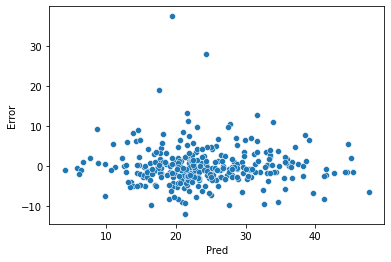

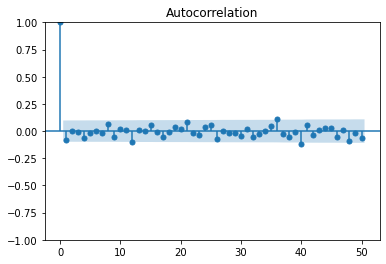

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.85,0.70,8.11,51.81
p-value,0.00,0.01,0.62,0.40
Alternative,NaN,two-sided,NaN,NaN


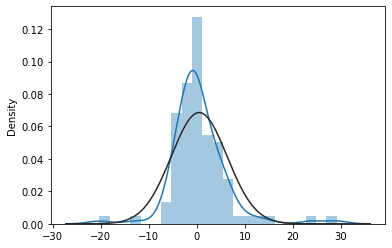

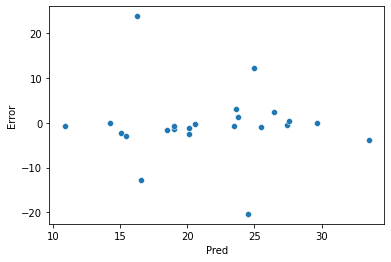

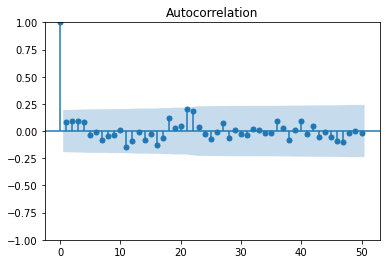

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.83,0.14,8.11,51.81
p-value,0.00,0.00,0.62,0.40
Alternative,NaN,two-sided,NaN,NaN


In [106]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

# X_train_fe = feature_engineering(X_train)
# X_test_fe = feature_engineering(X_test)
# X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

# scaler = preprocessing.MinMaxScaler()
# X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train)
X_test_fes = sm.add_constant(X_test)
model_lr = sm.OLS(Y_train, X_train).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score = evaluation_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 스케일링 외 전처리 반영 분석결과

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.71e-105
Time:                        00:03:14   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1098      0.035     -3.122      0.002      -0.179      -0.041
ZN             0.0361      0.015      2.345      0.020       0.006       0.066
INDUS         -0.0393      0.072     -0.548      0.584      -0.180       0.102
NOX          -14.1708      4.451     -3.184      0.002     -22.922      -5.420
RM             6.2672      0.466     13.453      0.000       5.351       7.183
AGE           -0.0338      0.015     -2.294      0.022      -0.063      -0.005
DIS           -1.2884      0.226     -5.691      0.000      -1.733      -0.843
RAD            0.4776      0.185      2.586      0.010       0.114       0.841
PTRATIO       -0.8674      0.148     -5.874      0.000      -1.158      -0.577
B              0.0105      0.003      3.387      0.001       0.004       0.017
LSTAT         -0.2858      0.057     -5.010      0.000      -0.398      -0.174
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        17.1128      6.061      2.824      0.005       5.197      29.029
CHAS_1        18.6594      6.201      3.009      0.003       6.468      30.850
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

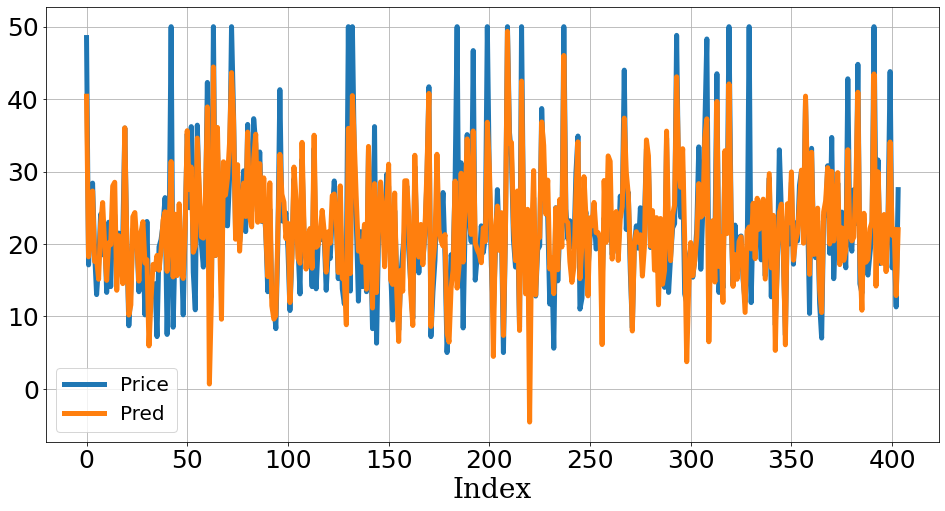

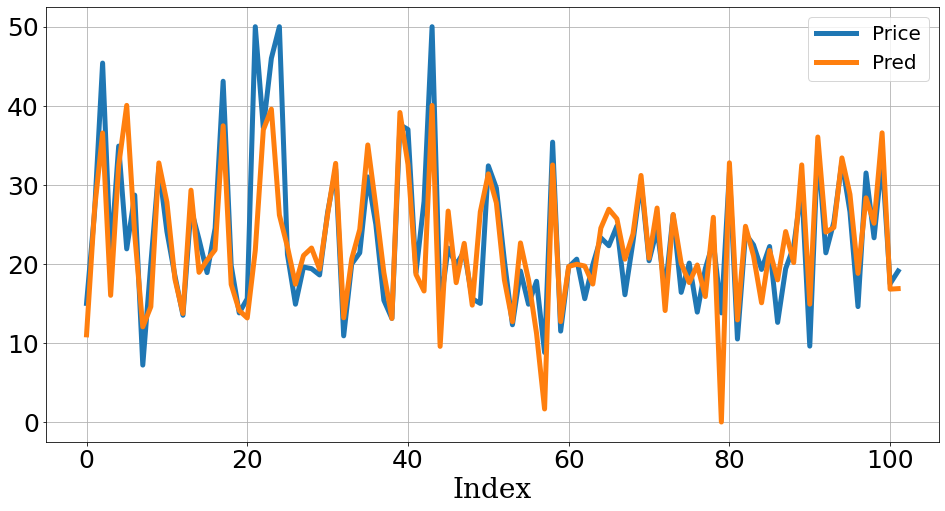

,MAE,MSE,MAPE
Train,3.07,21.05,0.16
Test,3.51,31.34,0.17


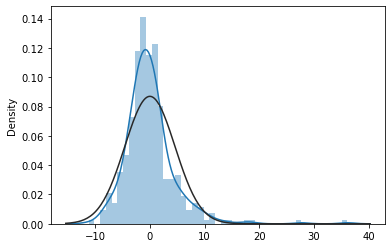

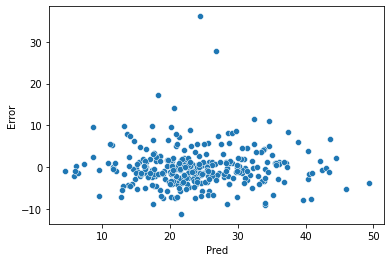

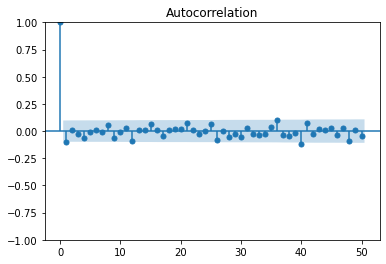

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.86,0.73,9.18,50.77
p-value,0.00,0.03,0.51,0.44
Alternative,NaN,two-sided,NaN,NaN


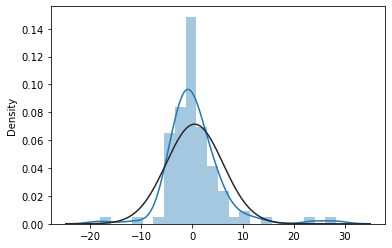

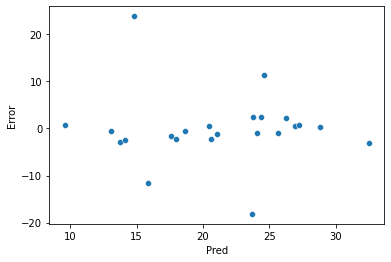

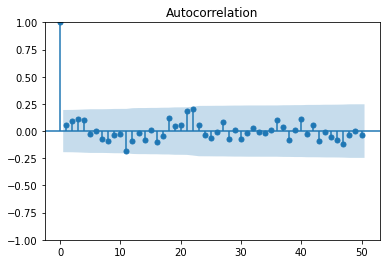

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.83,0.13,9.18,50.77
p-value,0.00,0.00,0.51,0.44
Alternative,NaN,two-sided,NaN,NaN


In [107]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

# scaler = preprocessing.MinMaxScaler()
# X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train_fe)
X_test_fes = sm.add_constant(X_test_fe)
model_lr = sm.OLS(Y_train, X_train_fe).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train_fe), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fe), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score = evaluation_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fe, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fe, Y_tepred, Resid_te, graph_on=True)
display(Error_te)

## 전처리 모두 반영 분석결과

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.71e-105
Time:                        00:03:16   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1290      2.030      8.439      0.000      13.138      21.120
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0         7.7912      1.035      7.528      0.000       5.756       9.826
CHAS_1         9.3378      1.235      7.559      0.000       6.909      11.767
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

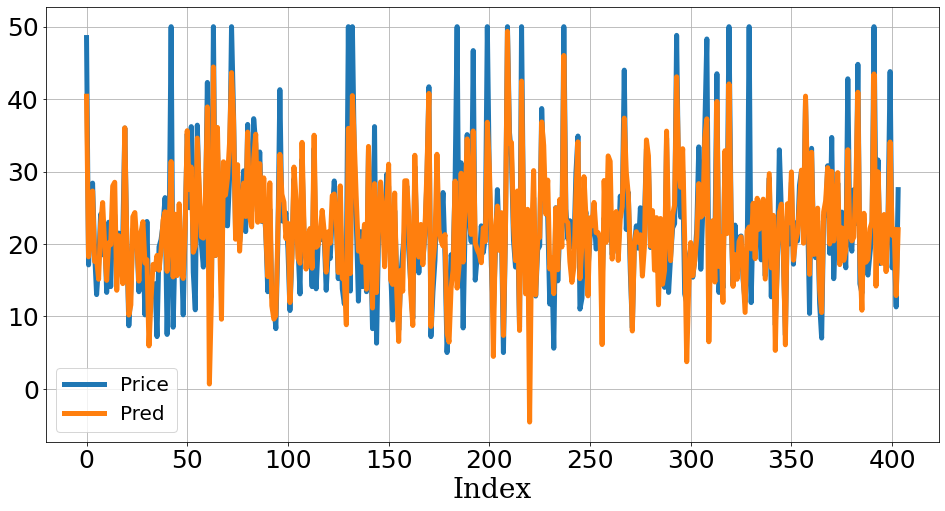

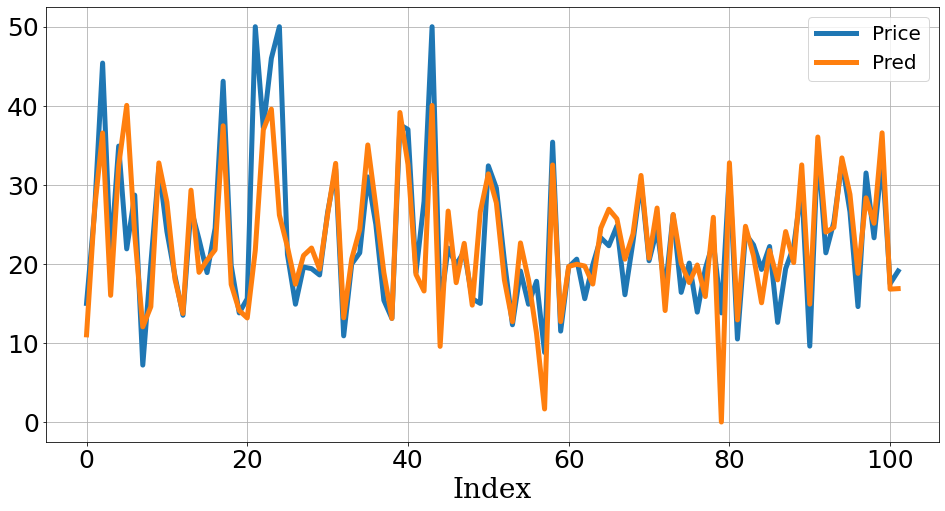

,MAE,MSE,MAPE
Train,3.07,21.05,0.16
Test,3.51,31.34,0.17


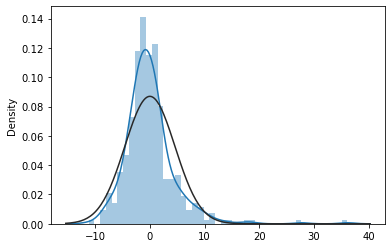

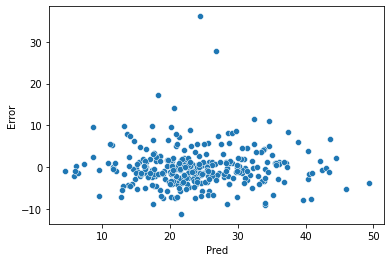

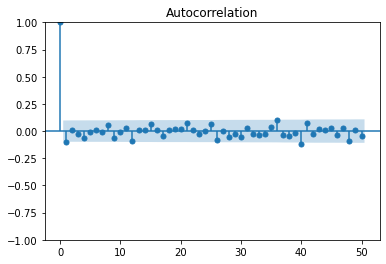

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.86,0.73,9.18,50.77
p-value,0.00,0.03,0.51,0.44
Alternative,NaN,two-sided,NaN,NaN


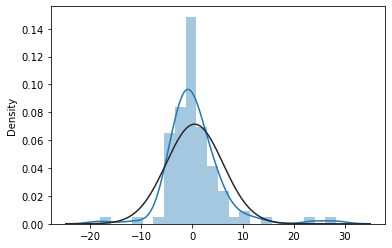

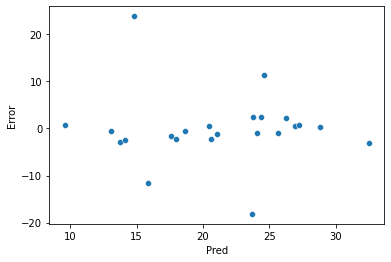

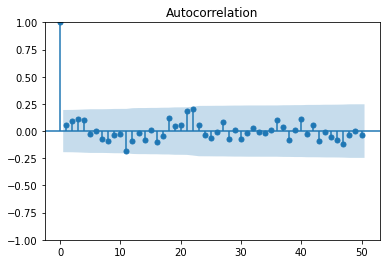

,Normality,Heteroscedasticity,Autocorr(lag10),Autocorr(lag50)
Test Statistics,0.83,0.13,9.18,50.77
p-value,0.00,0.00,0.51,0.44
Alternative,NaN,two-sided,NaN,NaN


In [108]:
# 데이터 로딩
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Linear Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)
model_lr = sm.OLS(Y_train, X_train_fes).fit()
display(model_lr.summary())

Y_trpred = pd.DataFrame(model_lr.predict(X_train_fes), columns=['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test_fes), columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score = evaluation_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score)

# 에러 분석
Resid_tr = Y_train - Y_trpred.values
Resid_tr.columns = ['Error']
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']

Error_tr = error_analysis(X_train_fes, Y_trpred, Resid_tr, graph_on=True)
display(Error_tr)
Error_te = error_analysis(X_test_fes, Y_tepred, Resid_te, graph_on=True)
display(Error_te)